<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Otter_Final_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Investigating the impact of income, consumption patterns and waste**

Apolline Bertin, Simon Chappatte, Alain Franco



---



In [1]:
#Let's first import a few libraries we will be using during our case

!pip install matplotlib
!pip install plotly matplotlib seaborn sklearn pandas geopandas scipy
!pip install linearmodels
!pip install statsmodels
!pip install stargazer
!pip install mplcursors==0.5.2
!pip install linearmodels==4.24

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import plotly.express as px
import seaborn as sns
import geopandas as gpd
import statsmodels.formula.api as smf
import mplcursors
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans
from scipy.stats import skew
from stargazer.stargazer import Stargazer
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from linearmodels.iv import IV2SLS
from IPython.core.display import display, HTML

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21164 sha256=fa0723390d6e1239974644741dfcf7462a636a4b6c1e9f8dad132ced8fc9a44b
 

**Waste is everywhere.** From your own trash bin to the pile of garbage burnt in landfills, waste keeps being generated. In 2020 alone, the European Union generated **2.1 billion tonnes of waste**, corresponding to 4 815 kilograms (kg) of waste per European (World Bank, 2024)[1].

**But, what drives the amount of waste households we produce?** Is waste a by-product of consumption, increasing as economies grow? Could it be that as our wallet grows, we tend to consume more, and therefore generate more waste?



---



## **The Waste - Income Case**

In [2]:
#Spoiler alert! Let's import the data we will use in the rest of our analysis...that we will present more formally later on!
waste_per_capita = pd.read_csv('https://raw.githubusercontent.com/gaojing33/Stat-Data-Science/refs/heads/main/filtered_waste_per_capita.csv') #Waste data
income_clean = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/income_clean_w_average.csv') #Income data
merged_data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv') #All variables merged
env_awareness_data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Environment_awareness_long.csv') #Environmental Awareness data

In [3]:
merged_data.head() #Let's very quickly see what our data look like

Country  Year       Waste   Income  Education  Women  Household   Age  \
0   Belgium  2014  484.672171  21705.0       32.6   62.9        2.3  41.3   
1  Bulgaria  2014  376.962939   3311.0       23.6   61.5        2.6  43.7   
2   Czechia  2014  310.164578   7622.0       19.1   64.7        2.4  40.8   
3   Denmark  2014  636.289226  27861.0       29.4   71.0        2.0  41.3   
4   Germany  2014  456.714036  19733.0       23.2   72.1        2.0  45.6   

     Urban  
0  0.97833  
1  0.73651  
2  0.73384  
3  0.87410  
4  0.77190

In Europe, the wealth differences between Northern and Southern Europe can be explained by several factors, such as fertile regions (e.g., the European plains), historical protection from invasions (mountain ranges in France/Italy/Switzerland), favourable trade routes, and lower ethnic diversity promoting early collaboration. Countries like Poland have faced challenging geostrategic positions, which have influenced their development.

Western and Northern households, where industrialisation has historically been more advanced and living standards are higher, therefore tend to have a higher net income, and seem to generate higher waste per capita. **This curious case caught our attention and we had to call you, Inspector Garbage, to help us solve it**.

In [4]:
# Visualising European Average Household Waste per capita

# Ensure we have country codes for plotting
iso_codes = {
    'Belgium': 'BEL', 'Bulgaria': 'BGR', 'Czechia': 'CZE', 'Denmark': 'DNK', 'Germany': 'DEU',
    'Estonia': 'EST', 'Ireland': 'IRL', 'Greece': 'GRC', 'Spain': 'ESP', 'France': 'FRA',
    'Croatia': 'HRV', 'Italy': 'ITA', 'Cyprus': 'CYP', 'Latvia': 'LVA', 'Lithuania': 'LTU',
    'Luxembourg': 'LUX', 'Hungary': 'HUN', 'Netherlands': 'NLD', 'Austria': 'AUT', 'Poland': 'POL',
    'Portugal': 'PRT', 'Romania': 'ROU', 'Slovenia': 'SVN', 'Slovakia': 'SVK', 'Finland': 'FIN',
    'Sweden': 'SWE', 'Iceland': 'ISL', 'Norway': 'NOR', 'Switzerland': 'CHE'
}

# Add the ISO-3 country codes to the DataFrame
waste_per_capita['iso_alpha'] = waste_per_capita['Country'].map(iso_codes)

# Convert waste per capita columns (2014-2022) to numeric, coercing errors to NaN
years = waste_per_capita.columns[1:-1]  # Exclude the 'Country' and 'iso_alpha' columns
waste_per_capita[years] = waste_per_capita[years].apply(pd.to_numeric, errors='coerce')

# Calculate the mean waste per capita across all years (2014–2022) for each country
waste_per_capita['mean_waste_per_capita'] = waste_per_capita[years].mean(axis=1)

# Create a choropleth map where the color reflects the mean waste per capita
fig = px.choropleth(
    waste_per_capita,
    locations="iso_alpha",  # Use the ISO-3 country codes
    color="mean_waste_per_capita",  # Use the calculated mean waste per capita for color gradient
    hover_name="Country",  # Show country name on hover
    color_continuous_scale="Blues",  # Use a color scale that indicates variation
    title="Mean Waste per Capita (2014–2022) in European Countries"
)

# Customize the map to focus on Europe
fig.update_geos(
    scope="europe",  # Focus the map on Europe
    projection_type="mercator",  # Use a flat Mercator projection
    showland=True,  # Show land in the map
    landcolor="lightgray",  # Color for land areas
    showcountries=True,  # Show country borders
    countrycolor="black"  # Country borders color
)

# Update layout for horizontal visuals
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="black"),
    height=1000,  # Decrease height for a more horizontal layout
    width=1000,  # Increase width to make the map horizontal
    margin={"r":0,"t":40,"l":0,"b":0}  # Adjust margins for better fitting
)

# Show the interactive map
fig.show()

In [5]:
#Visualising European Average Net Income Graph

# Create the choropleth map for the average income
fig = px.choropleth(income_clean,
                    locations="Country",
                    locationmode='country names',
                    color="Average",  # Use the 'Average' column for color
                    hover_name="Country",
                    color_continuous_scale="Blues",
                    title="Average Annual Net Income per Capita (euro) (All Years)",
                    scope="europe")

# Update layout for horizontal visuals
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, coastlinecolor="black"),
    height=1000,  # Decrease height for a more horizontal layout
    width=1000,  # Increase width to make the map horizontal
    margin={"r":0,"t":40,"l":0,"b":0}  # Adjust margins for better fitting
)

fig.show()




The positive correlation between waste generation and income level is often demonstrated by Chief Literature: as disposable income and living standards increase, consumption of goods tends to follow, and waste generation increases accordingly (Hoornweg and Bhada-Tata, 2012; Irwan et al., 2013; Keser et al., 2012; Wilson et al., 2012) [2][3][4][5].

But income isn’t the only suspect in this case. We also found that socioeconomic factors like **education levels, household size and gender** also influence waste generation (Ogwueleka, 2013; Bandara et al., 2007) [6][7]. Wealthier households may produce more waste but they might also have greater access to recycling facilities or adopt more sustainable habits due to higher environmental awareness (Kayode and Omole, 2011)[8]. Meanwhile, societal changes such as urbanization could be reshaping the composition and quantity of waste (Daniel Hoornweg et al., 2012; Monavari et al., 2012) [9][10]. Yet, the effects of those may not be at the same level in different locations (Keser et al., 2011) [11].
By investigating the link between income, consumption habits and waste, we ask you, Inspector Garbage, to help us answer the question: **what is the impact of consumption habits on household waste?**

This case is not new, it is one of the 21st century’s most pressing environmental mysteries. But while most missions focus on city or country level (Alzamora et al., 2022) [12], we decided to work at a bigger scale by analysing European cases . We also envisioned extending the existing findings by looking at the role of environmental awareness to potentially refine the results.

**Welcome to the case Inspector Garbage**, let’s explore the evidence, analyze the suspect-variables, and reveal the hidden connections shaping our waste-filled world.

**“Go-go Garbage!”**  




---



## **Materials: Gathering the evidence**

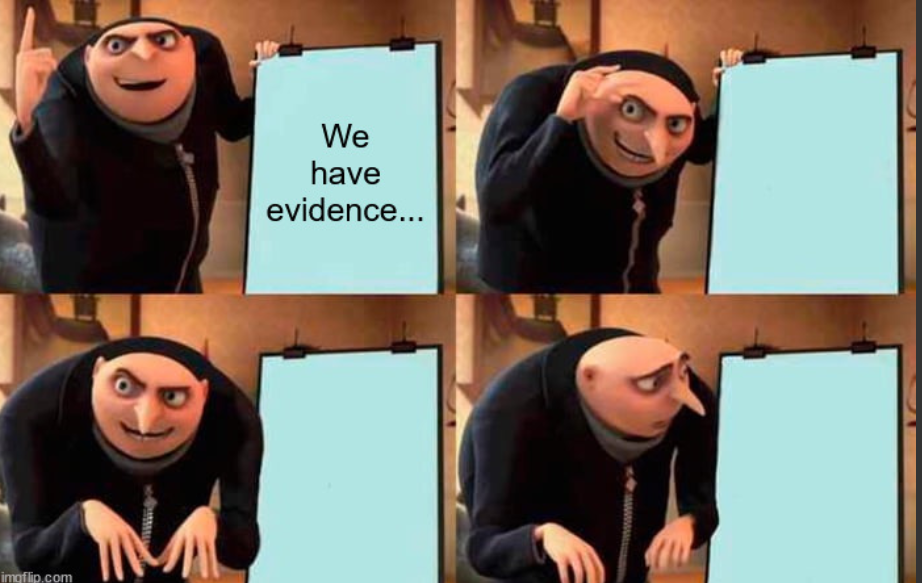

*To crack this case, we need evidence. For that, we call in our trusted informant for European data.*

We measure **household waste (in kilograms per capita)** by the amount of solid waste composed of garbage, which normally originates from houses.

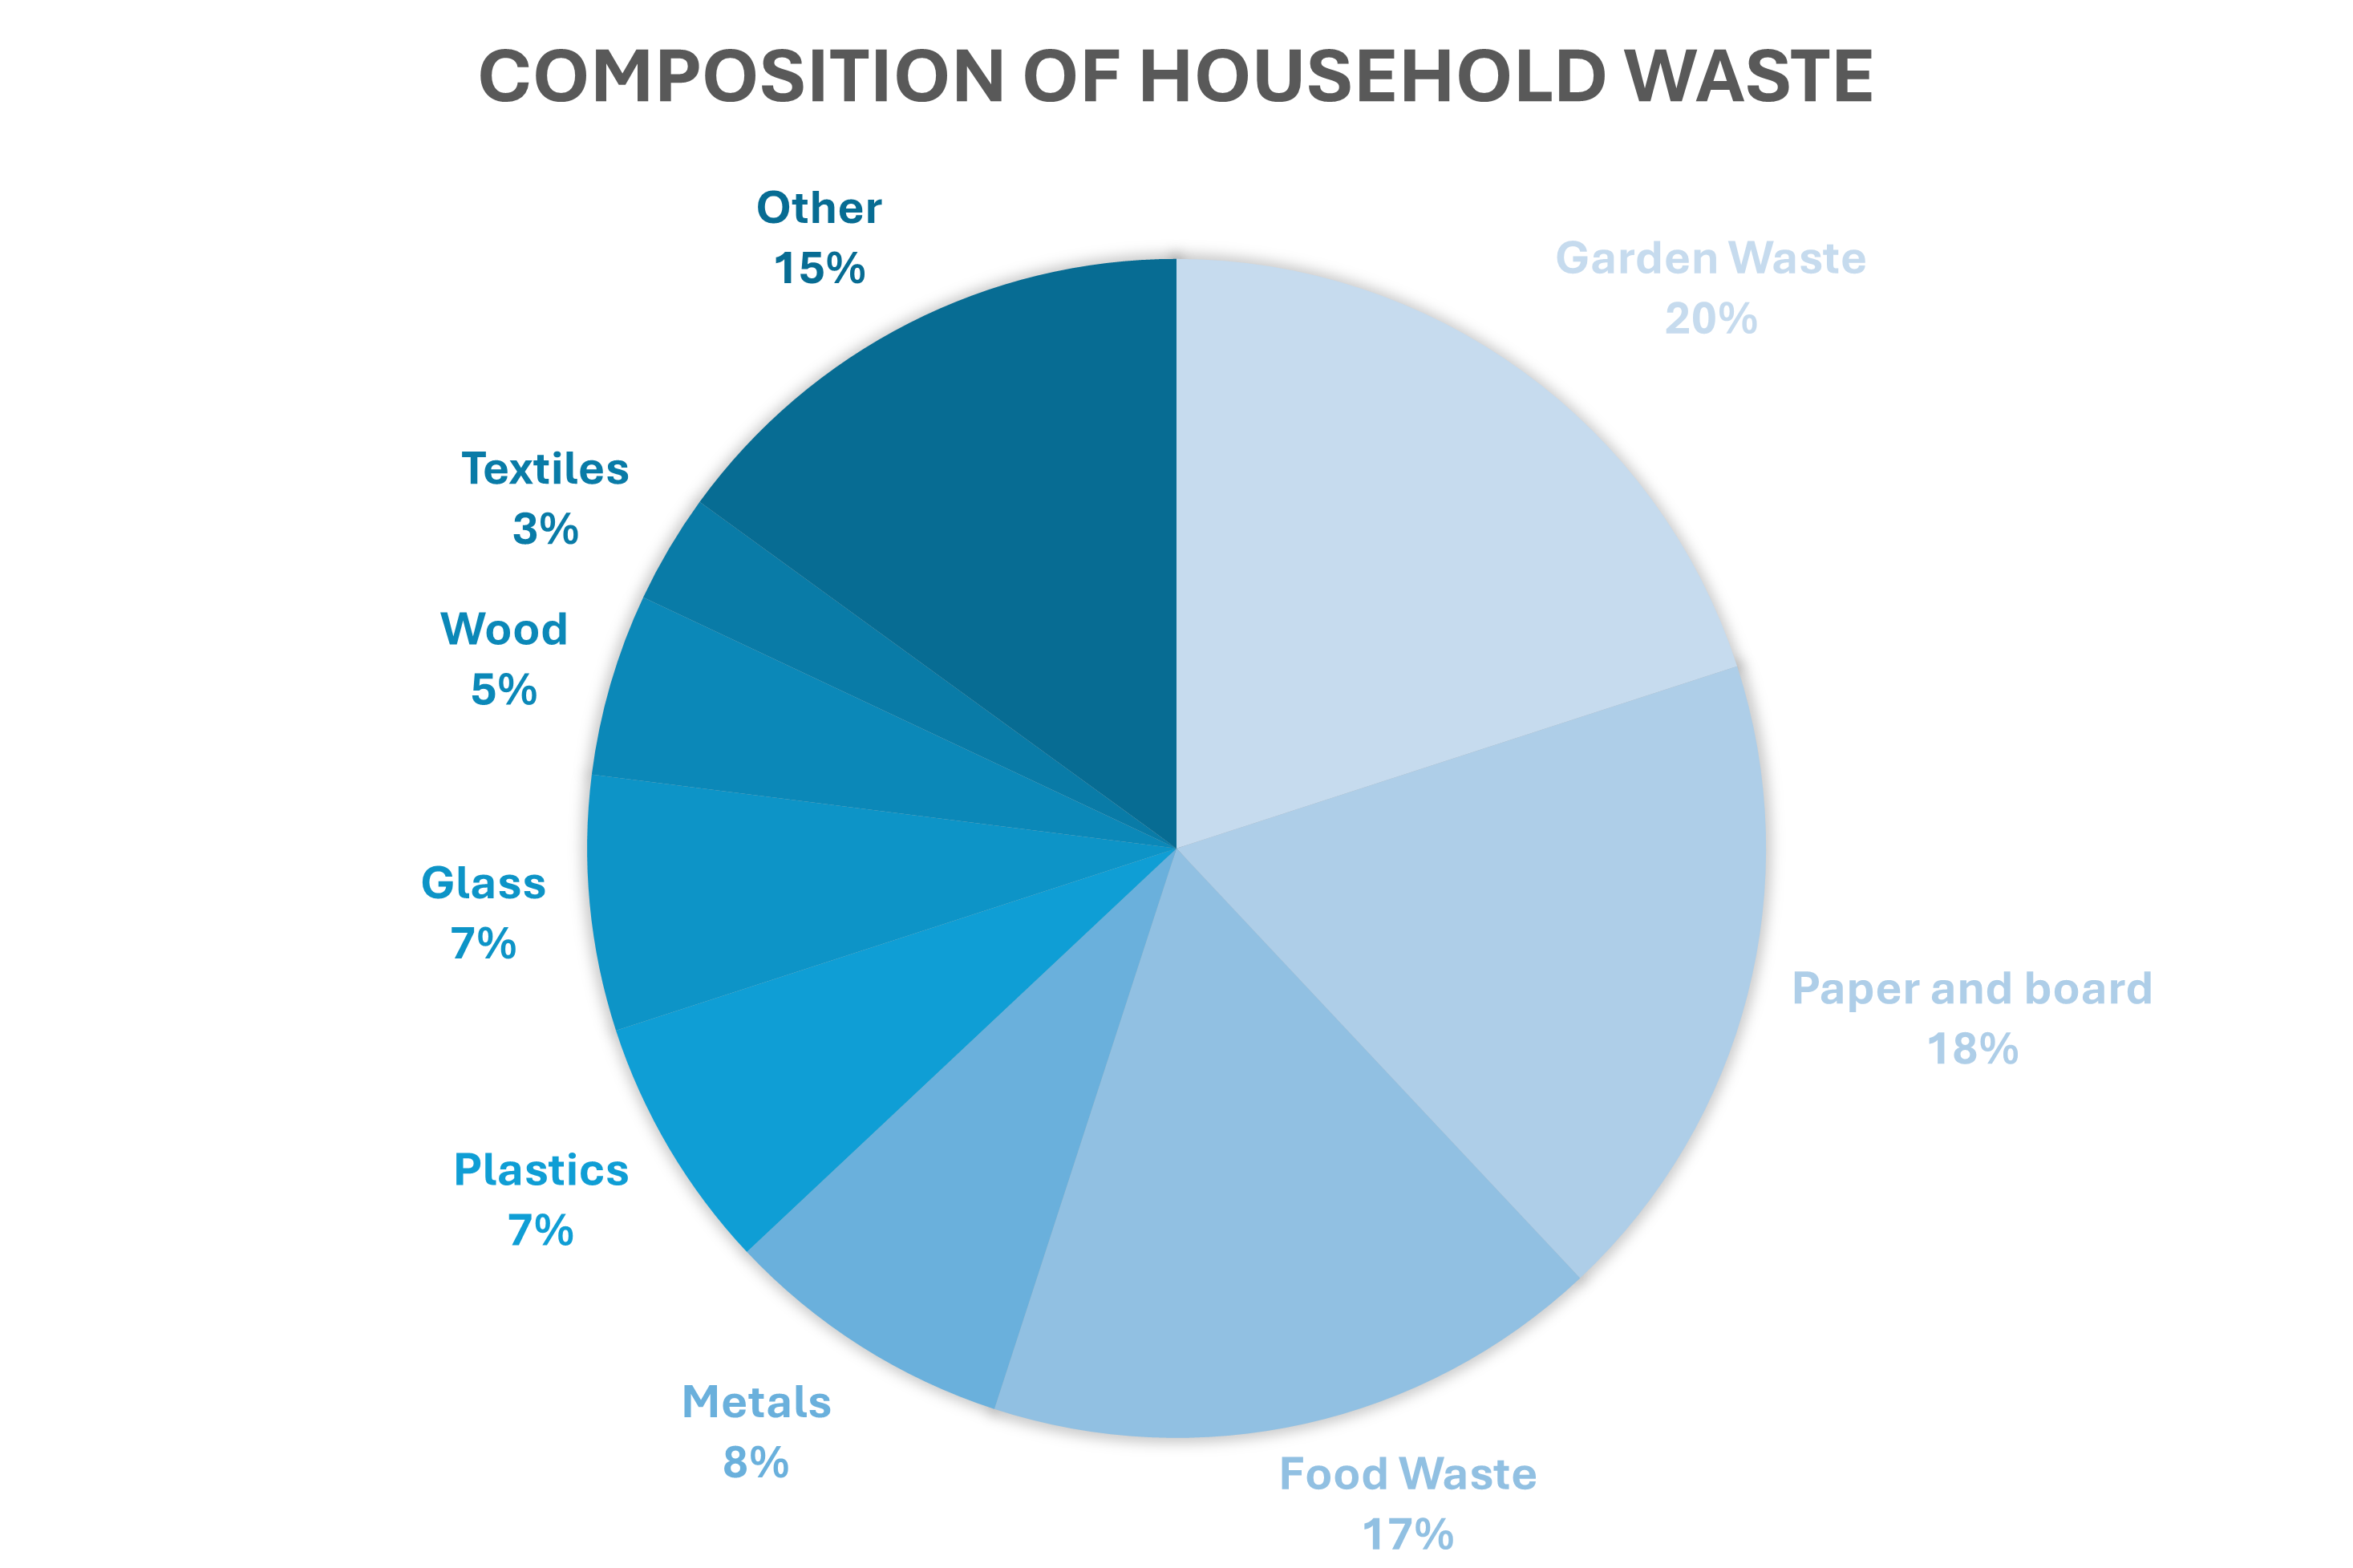

[Figure 1: Example of waste composition of a household](https://www.researchgate.net/profile/Julian-Parfitt/publication/239579199_Analysis_of_household_waste_composition_and_factors_driving_waste_increases/links/580e253a08ae63978e00d1ef/Analysis-of-household-waste-composition-and-factors-driving-waste-increases.pdf)

As we collect the additional key variables, we realise that tracking the exact number of goods consumed by individuals is complex, while income data is easier to access, widely available in Europe and reflects broader economic behavior influencing not just purchases but also waste-related habits (e.g.,bulk options when going zero waste). **We therefore use the net median income as a proxy for consumption.**

Of course, we realise that in this kind of complex case, we cannot only focus on one suspect. In order to rule out potential accomplices, we control for a number of suspect variables which, according to the literature, might play a role in our case:


*   **Education level:** people with higher education are more inclined to have higher paid jobs and may be more aware of environmental problems, potentially leading to a decrease in consumption (Almazora et al., 2022) [12]

*   **Urbanization:** cities might offer a higher economic activity, and consumption tends to be lower in rural areas than in urban areas, as there might be fewer points and less economic activities (Hoornweg et al., 2012) [9]

*   **Age:** younger households, potentially earning less money, may consume more tangibles goods such as mobile devices, games and personal care products (Salo et al., 2021) [13]; at the same time, houses with younger residents may be more aware of environmental issues therefore producing less waste (Khan et al., 2016) [14]

*   **Household size:** bigger households might generate more revenue, and there might be a phenomena of “common consumption” of the family as the household operates as a unit and most of the food items are shared, potentially generating less waste (Noufal et al., 2020) [15]

*   **Gender:** gender pay gap might influence the household’s revenue, and climate change action might be more pronounced in females, influencing their consumption habits (Beutel and Marini, 1995) [16]

*   **Environmental awareness:** one person’s importance of environment protection might influence their consumption habits, leading them to decrease their waste production

*   **Tourism in house:** tourism in private homes (e.g., Airbnb) might contribute directly to household waste, as waste generated by tourists is counted as residential waste, unlike hotels where waste is managed separately. It also boosts local income through rental earnings and spending in the area.

*   **Covid-19 pandemic:** the sample we are analyzing (2014–2022) experienced a major economic shock, the COVID-19 pandemic. This disrupted income per capita and significantly altered consumption patterns, with shifts toward essentials and reduced discretionary spending.

*   **Brexit:** [ajouter explication]

All variables and their relationships are summarized in the graph below:




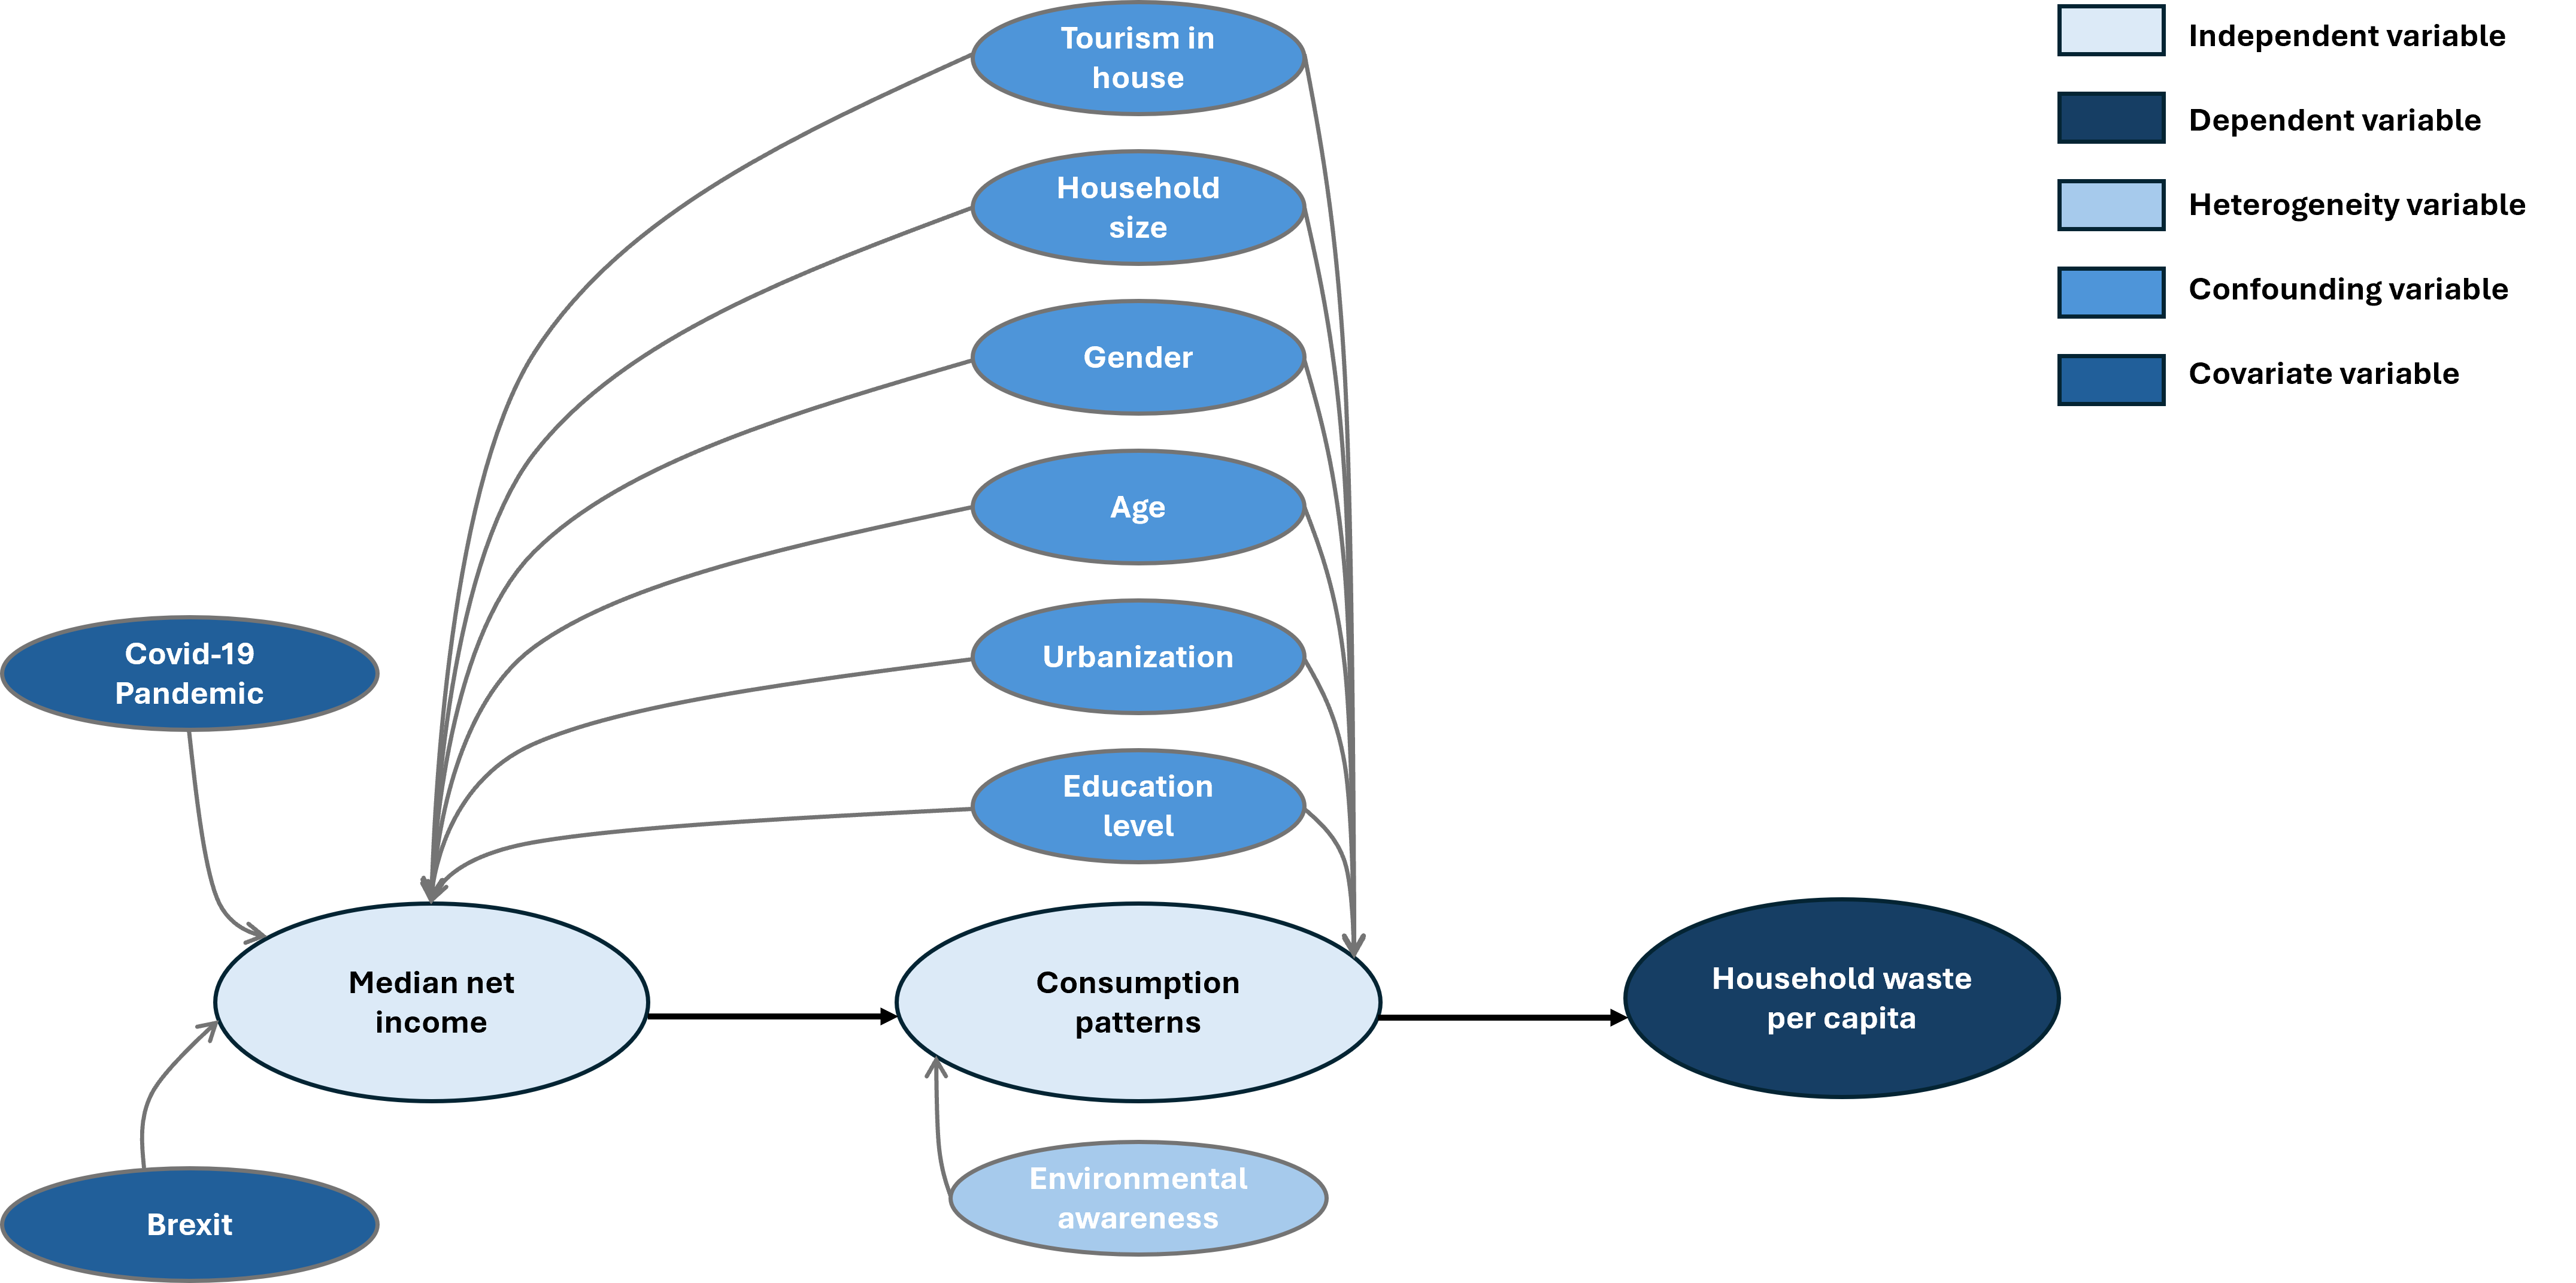

*Figure 2: Directed Acyclic Graph (DAG)*

Like any good detective, we know the data might have blind spots. We then need to carefully clean and cross-check our evidence to ensure that we have a consistent and reliable set of data.


###Data Transformation and Approximation



*   **Log transformation of net median income per capita:**
    by using the logarithmic transformation, the results now capture the effect of a 1% increase in net median income on household waste rather than absolute changes. This adjustment enhances interpretability and aligns the analysis with standard practices in panel data econometrics.



*   **Approximation:** waste per capita data was bi-annual. For
    consistency with income data, we approximated the waste for odd years
    by averaging the surrounding even years.




###Year Fixed Effects
These capture time-specific effects that impact all countries in the same way during a specific year, such as:

Global economic crises.

*   Global economic crisis
*   Advances in waste management technology or practices
*   Internation agreements on environmental standard


###Country Fixed Effects
These capture country-specific factors that remain constant over time, such as:


*   Institutional difference like government policies
*   Long-Standing cultural attitudes toward waste generation




### Quick Dataframe transformation

In [ ]:
#Let"s also quickly transform our data from our merged dataframa from before

#Convert 'Country' and 'Year' to categorical variables
merged_data['Country'] = merged_data['Country'].astype('category')
merged_data['Year'] = merged_data['Year'].astype('category')
merged_data.head()

Country  Year       Waste   Income  Education  Women  Household   Age  \
0   Belgium  2014  484.672171  21705.0       32.6   62.9        2.3  41.3   
1  Bulgaria  2014  376.962939   3311.0       23.6   61.5        2.6  43.7   
2   Czechia  2014  310.164578   7622.0       19.1   64.7        2.4  40.8   
3   Denmark  2014  636.289226  27861.0       29.4   71.0        2.0  41.3   
4   Germany  2014  456.714036  19733.0       23.2   72.1        2.0  45.6   

     Urban  
0  0.97833  
1  0.73651  
2  0.73384  
3  0.87410  
4  0.77190

### Baseline equation


\begin{equation}
\text{Waste}_{i,t} = \beta_0 + \beta_1 \text{Income}_{i,t} + \beta_2 \text{Education}_{i,t} + \beta_3 \text{Household}_{i,t} + \beta_4 \text{Urban}_{i,t} + \beta_5 \text{Age}_{i,t} + \alpha_i + \gamma_t + \varepsilon_{i,t}
\end{equation}



---



## **Results: A trail of clues**

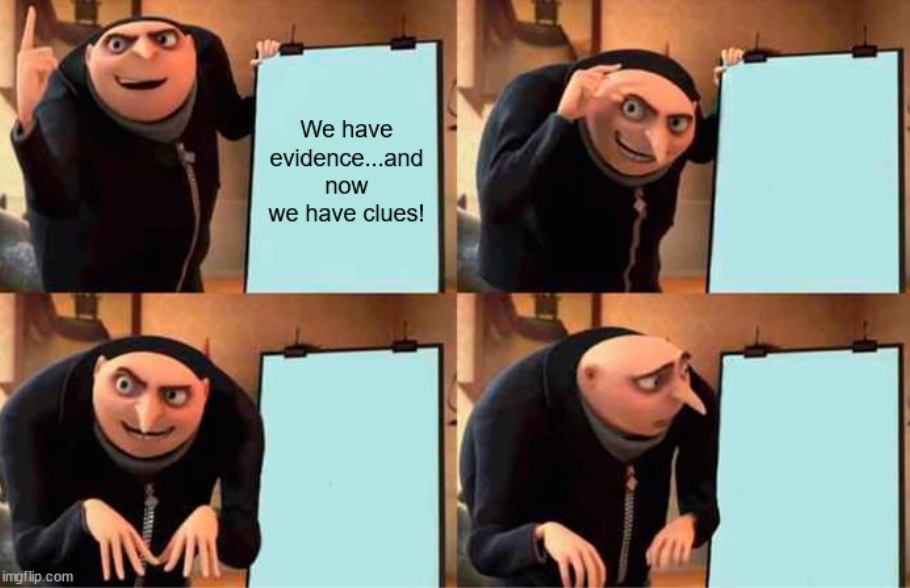

### First Hint

We now have all the necessary tools to successfully carry out this investigation. To see if our first insight as detectives was true, let's visualize whether our first assumption holds. As shown in *Figure 3*, there is a clear correlation between household waste and income. Our first assumption therefore might be true. However, as Inspector Garbage knows well, there is still plenty of the unknown to uncover to prove causality in this pattern...


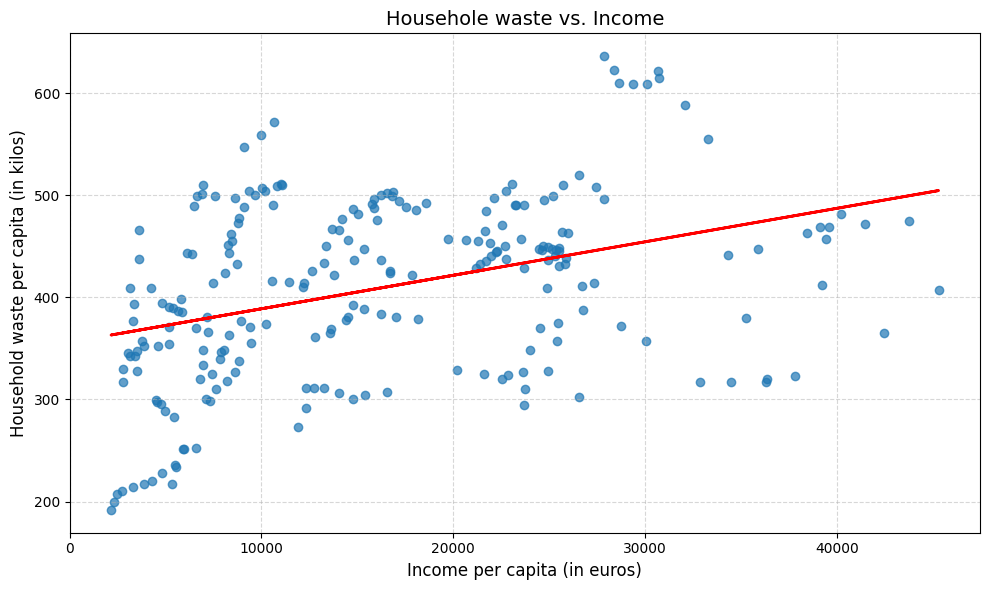

In [ ]:
#First Correlation Plot of our Baseline Equation

new_data = merged_data[['Country', 'Year', 'Waste', 'Income']]
# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increased figure size
scatter = ax.scatter(new_data['Income'], new_data['Waste'], alpha=0.7)  # Added transparency
plt.xlabel('Income per capita (in euros)', fontsize=12)
plt.ylabel('Household waste per capita (in kilos)', fontsize=12)  # Increased font size
plt.title('Househole waste vs. Income', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)  # Added gridlines

# Add a line of best fit
x = new_data['Income']
y = new_data['Waste']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color='red', linestyle='-', linewidth=2)  # Customized line style

# Add interactive annotations using mplcursors
cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(f"{new_data['Country'][sel.target.index]} ({new_data['Year'][sel.target.index]})")
)
cursor.connect("add", lambda sel: sel.annotation.get_bbox_patch().set(fc="white", alpha=0.8))  # Annotation background


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

*Figure 3: Baseline regression - Evolution of household waste per capita the depending on the median net income per capita*

After running a linear regression on our two prime suspects — **median net income per capita** and **household waste per capita** — a first clue emerges: the logarithm of income (Log_Income) has a positive and statistically significant connection with waste production.

The parameter for the logarithm of income is **108.74**, meaning that a **1% increase** **in income** increases household waste by **1.0874 kilograms**. The P-value, being lower than **0.01**, indicates **high statistical significance** in our results.

Inspector, it seems that economic growth leaves behind more than wealth, it leaves a growing trail of garbage. This connection might be a crucial lead in solving the mystery of waste production.


In [ ]:
# Calculation of some key parameters to support evidence

warnings.filterwarnings("ignore", category=FutureWarning, message=".*observed=False.*")

# Convert 'Country' and 'Year' to categorical variables (if not already)
merged_data['Country'] = merged_data['Country'].astype('category')
merged_data['Year'] = merged_data['Year'].astype('category')
merged_data['Year'] = merged_data['Year'].astype(int)  # Or float if years are not integers
merged_data = merged_data.set_index(['Country', 'Year'])

# Define the dependent variable (Y) and independent variables (X)
# Define dependent variable
Y = merged_data['Waste']

# Apply log transformation to the independent variable 'Income'
merged_data['Log_Income'] = np.log(merged_data['Income'])

# Define independent variable using log-transformed 'Income'
X = merged_data[['Log_Income']]


X = merged_data[['Log_Income']]
# Add a constant term to the independent variables
X = sm.add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')
# Create a DataFrame with parameters and p-values
results_table = pd.DataFrame({'Parameter': results.params, 'P-value': results.pvalues})

# Display the table
display(results_table)

Parameter   P-value
const      -620.242855  0.005156
Log_Income  108.740628  0.000005

By clustering the 26 countries into four income clusters **(see Figure 4??)**, we observe an increasing pattern in household waste per capita, reinforcing our initial hypothesis regarding the relationship between income per capita and household waste. However, **we also notice that the difference within the highest income cluster is relatively small.** This suggests that while richer countries tend to produce more household waste than poorer ones, this trend plateaus beyond a certain threshold. This indicates that **income per capita is likely not the only suspect-variable influencing household waste**, and that other factors need to be considered in our investigation to better understand the causal impacts of income on waste production.
Let's keep the go work, **go-go-go Garbage!**.


In [ ]:
# Calculate the average for each country across all years
country_averages = merged_data.groupby('Country')[['Waste', 'Income']].mean().reset_index()
#Reset index before creating new_data
merged_data = merged_data.reset_index()
new_data = merged_data[['Country', 'Year', 'Waste', 'Income']]

In [ ]:
# Define the countries for each cluster
cluster1_countries = ['Romania', 'Bulgaria', 'Türkiye', 'Hungary', 'Poland', 'Lithuania','Lativa']
cluster2_countries = ['Slovakia', 'Czechia', 'Portugal','Estonia','Slovenia','Spain']
cluster3_countries = ['Malta', 'Cyprus', 'Italy','France','Germany','Belgium','Finland']
cluster4_countries = ['Denmark', 'Austria', 'Sweden', 'Ireland', 'Luxembourg','Norway']

# Create a new column 'Cluster' in the DataFrame
merged_data['Cluster'] = 0  # Initialize with 0

# Assign cluster numbers based on country
merged_data.loc[merged_data['Country'].isin(cluster1_countries), 'Cluster'] = 0
merged_data.loc[merged_data['Country'].isin(cluster2_countries), 'Cluster'] = 1
merged_data.loc[merged_data['Country'].isin(cluster3_countries), 'Cluster'] = 2
merged_data.loc[merged_data['Country'].isin(cluster4_countries), 'Cluster'] = 3

cluster_means = merged_data.groupby('Cluster')[['Waste', 'Income']].mean()

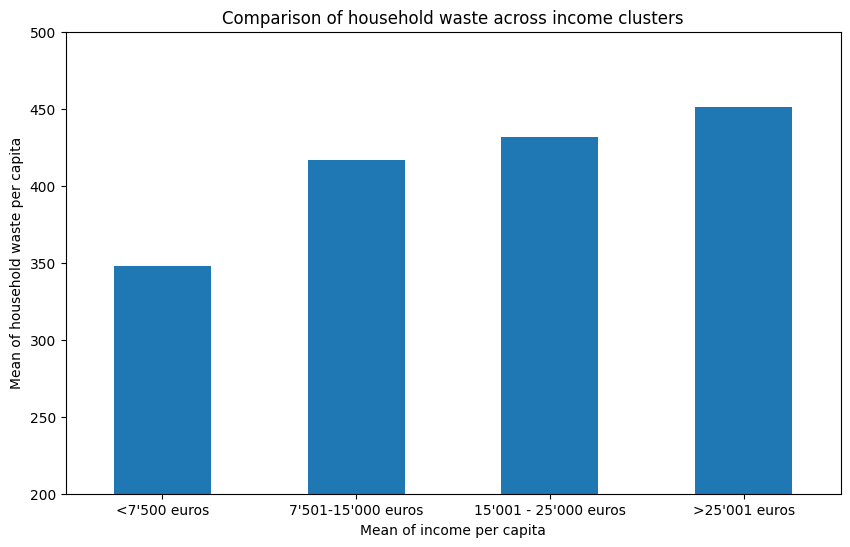

In [ ]:
# Create bar chart for Waste with custom cluster names
cluster_means['Waste'].plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of household waste across income clusters')
plt.xlabel('Mean of income per capita')
plt.ylabel('Mean of household waste per capita')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Custom cluster names
cluster_names = ['<7\'500 euros', '7\'501-15\'000 euros', '15\'001 - 25\'000 euros', '>25\'001 euros']
plt.xticks(range(len(cluster_names)), cluster_names, rotation = 0, ha='center')  # Set custom x-axis labels

plt.ylim(200, 500)
plt.show()

*Figure 4:*

### DNA at our crime scene

We now know that Income isn’t the only suspect in this case and that he probably has accomplices. Based on Chief Literature's review, we know that the **mains confounding variable** are:



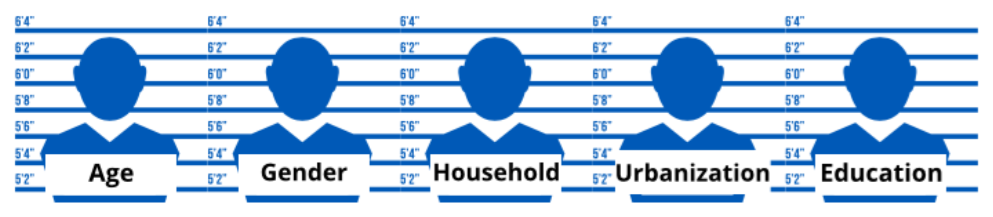

*Figure 5: Main cofounding variables*

To determine which of these variables are relevant to our case, we will perform an Ordinary Least Squares (OLS) regression. This method will help us analyze which of these variables significantly impact our results. It is in other words, a sort of DNA test!

### Our OLS with confounders

Our OLS model is specified as:


$$
\text{Waste}_{i,t} = \beta_0 + \beta_1 \text{Income}_{i,t} + \beta_2 \text{Education}_{i,t}
+ \beta_3 \text{Household}_{i,t} + \beta_4 \text{Urban}_{i,t} + \beta_5 \text{Age}_{i,t}
+ \beta_6 \text{Women}_{i,t} + \alpha_i + \gamma_t + \varepsilon_{i,t}
$$

- *Waste*$_{i,t}$: Waste generated in country $i$ at time $t$.
- *Income*$_{i,t}$: Average income level of the population in country $i$ at time $t$.
- *Education*$_{i,t}$: Percentage of the population in country $i$ at time $t$ with a higher education diploma (Bachelor, Master, PhD).
- *Household*$_{i,t}$: Average number of people per household in country $i$ at time $t$.
- *Urban*$_{i,t}$: Percentage of the population in country $i$ at time $t$ living in urban areas.
- *Age*$_{i,t}$: Average age of the population in country $i$ at time $t$.
- *Women*$_{i,t}$: Proportion of women in the workforce in country $i$ at time $t$.
- $\alpha_i$: Country fixed effects (unobserved heterogeneity across countries).
- $\gamma_t$: Time fixed effects (common time-specific factors).
- $\varepsilon_{i,t}$: Error term capturing unobserved influences.

*The data, coming from multiple sources, are gathered in the Appendix **(NUMBER)**.*

After running the OLS regression (Appendix 2), we find that only two variables (Women and Urban), are not statistically significant when the full range of control variables is not accounted for. **All other variables seem to positively impact household waste per capita.** We also observe that the coefficient of our main variable of interest-**income is affected as additional variables are included.**

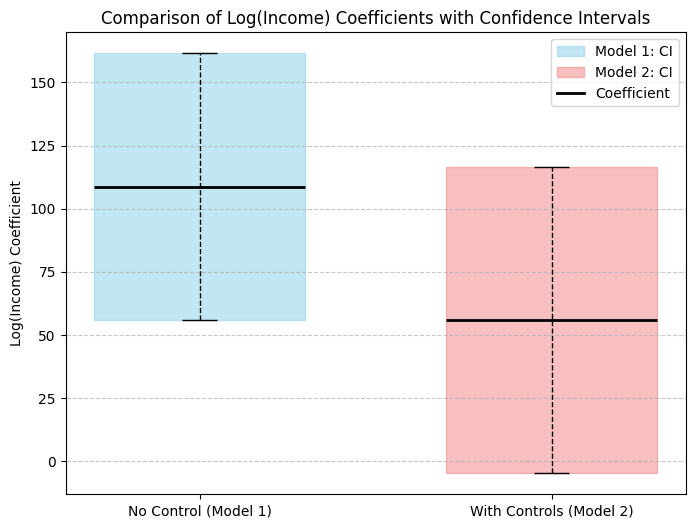

In [ ]:
# OLS Coefficients of our independent variable

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')

# Ensure the DataFrame has a MultiIndex for PanelOLS
data = data.set_index(['Country', 'Year'])

# Add an intercept to the data explicitly
data['Intercept'] = 1

# Create Log_Income column
data['Log_Income'] = np.log(data['Income'])

# Define and fit the models
model1 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income']],
                  entity_effects=True,
                  time_effects=True).fit()

model2 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income', 'Education']],
                  entity_effects=True,
                  time_effects=True).fit()

model3 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income', 'Education', 'Household']],
                  entity_effects=True,
                  time_effects=True).fit()

model4 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income', 'Education', 'Household', 'Women']],
                  entity_effects=True,
                  time_effects=True).fit()

model5 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income', 'Education', 'Household', 'Women', 'Urban']],
                  entity_effects=True,
                  time_effects=True).fit()

model6 = PanelOLS(dependent=data['Waste'],
                  exog=data[['Intercept', 'Log_Income', 'Education', 'Household', 'Women', 'Urban', 'Age']],
                  entity_effects=True,
                  time_effects=True).fit()

# Create the Stargazer object
stargazer = Stargazer([model1, model2, model3, model4, model5, model6])

# Customize the table (optional)
stargazer.title('Panel OLS Regression Results with Time Effects')
stargazer.covariate_order(['Intercept', 'Log_Income', 'Education', 'Household', 'Women', 'Urban', 'Age'])

# Extract coefficients and confidence intervals
coef_model1 = model1.params['Log_Income']
ci_model1 = model1.conf_int().loc['Log_Income']

coef_model6 = model6.params['Log_Income']
ci_model6 = model6.conf_int().loc['Log_Income']

# Use .iloc explicitly to access lower and upper confidence intervals
data_plot = pd.DataFrame({
    'Model': ['Model 1', 'Model 6'],
    'Lower CI': [ci_model1.iloc[0], ci_model6.iloc[0]],
    'Upper CI': [ci_model1.iloc[1], ci_model6.iloc[1]],
    'Coefficient': [coef_model1, coef_model6]
})

# Plot
plt.figure(figsize=(8, 6))
for idx, row in data_plot.iterrows():
    # Draw confidence interval rectangles
    plt.gca().add_patch(plt.Rectangle(
        (idx - 0.3, row['Lower CI']),  # Bottom left corner (x, y)
        0.6,  # Width
        row['Upper CI'] - row['Lower CI'],  # Height
        color='skyblue' if row['Model'] == 'Model 1' else 'lightcoral',
        alpha=0.5
    ))
    # Add horizontal line for the coefficient
    plt.hlines(y=row['Coefficient'], xmin=idx - 0.3, xmax=idx + 0.3, color='black', linewidth=2)

    # Add vertical lines for the upper and lower limits
    plt.vlines(x=idx, ymin=row['Lower CI'], ymax=row['Upper CI'], color='black', linewidth=1, linestyle='--')

    # Add small dashes (ticks) at the upper and lower points
    plt.hlines(y=row['Lower CI'], xmin=idx - 0.05, xmax=idx + 0.05, color='black', linewidth=1)  # Lower tick
    plt.hlines(y=row['Upper CI'], xmin=idx - 0.05, xmax=idx + 0.05, color='black', linewidth=1)  # Upper tick

# Custom legend handles
legend_handles = [
    Patch(facecolor='skyblue', edgecolor='skyblue', alpha=0.5, label='Model 1: CI'),
    Patch(facecolor='lightcoral', edgecolor='lightcoral', alpha=0.5, label='Model 2: CI'),
    Line2D([0], [0], color='black', linewidth=2, label='Coefficient')
]

# Customization
plt.xticks([0, 1], ['No Control (Model 1)', 'With Controls (Model 2)'])
plt.ylabel('Log(Income) Coefficient')
plt.title('Comparison of Log(Income) Coefficients with Confidence Intervals')
plt.legend(handles=legend_handles, loc='upper right')  # Legend moved to the upper right
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*Figure 6: (ADD NAME)*

As shown in *Figure 6*, the income coefficient decreases from **108.7 to 55.925**, with both values remaining **statistically significant**. This might indicate that, when controlling for other variables, **a 1% increase in net income might lead to an increase of 0.559 kilos of household waste per capita**, compared to the initially estimated 1.08 kilos. In other words, **failing to include these additional variables would result in overestimating the impact of income on household waste.** That’s a promising findings Inspector Garbage,let’s push the investigation even further!



---



##**Endogeneity: The unseen forces**

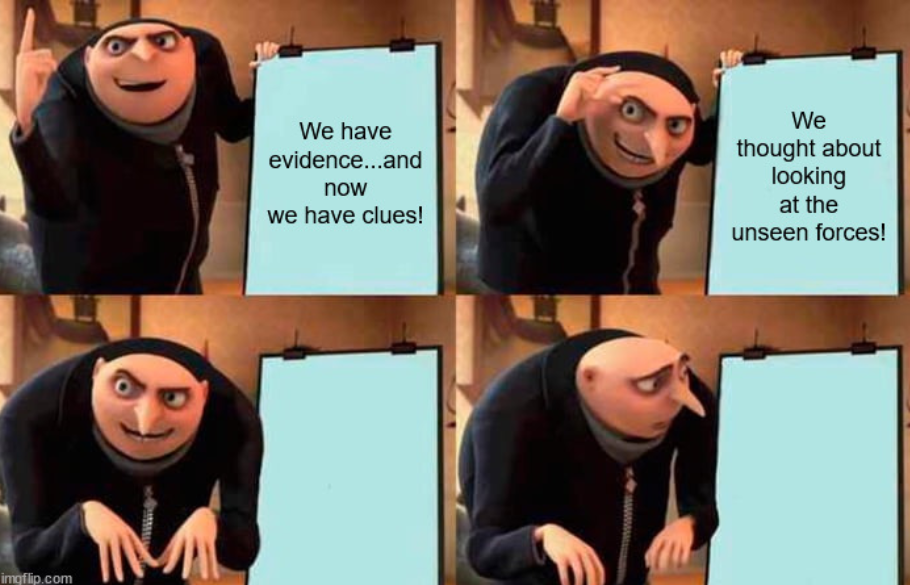

*Watch out, Inspector Garbage. Confounders are trying to mislead you! As detectives, we must control for these confounders to get to the truth.*

In a regression, we assume the independent variables (the factors we think cause the outcome) are not related to any hidden factors in the model (the error term). If this assumption is violated, we have **an endogeneity problem**.

When endogeneity is present, your conclusions about cause and effect in the case become unreliable. You might end up accusing the wrong suspect because you didn’t untangle the evidence properly. Worse, **you could miss the true criminal!**

This is why we need to take some time to properly assess our potential sources of endogeneity. *Are there any unobserved factors, reverse causality or errors in measurement that could mess with our investigation?*


###Selection bias
Our dataset includes 26 countries, of which 24 are from the EU. The selection was based on the availability of data from Eurostat. Many countries with insufficient information, such as Albania, Bosnia, and Montenegro, were not included in our analysis. These excluded countries are often poorer European nations, which may have lower sorting capacities or environmental constraints affecting their waste management practices. This suggests **a potential selection bias in our analysis**, as the dataset may overrepresent wealthier countries with more advanced waste management systems. To achieve more accurate results on a Europe-wide scale, it would be beneficial for further studies to include data from all 46 European countries.

###Omitted Variables Bias
The impact of income per capita on household waste per capita is complex and influenced by numerous factors and variables. Based on the literature review, we focused on the most significant variables to ensure accuracy. However it is possible that some variables are missing from our investigation, potentially introducing omitted variable bias.


**Examples of potential uncontrolled omitted variables:**

* **Behavioral factors:** higher-income households might adopt eco-friendly behaviorsthat reduce their waste production. Not including environmental awareness in the analysis may look like income drives lower waste more than in reality.

* **Inhouse Tourism:** as Airbnb and similar services have increased a lot recently in Europe, we might have an omitted variable as people benefitting from Airbnb services increase their income and visitors generate household waste.

* **Access to waste management services:** wealthier countries or areas might have better access to recycling or waste collection which might play a role in how much waste households generate.

* **Covid pandemic:** The Covid-19 pandemic likely influenced both income and waste. Many households experienced income shocks due to job losses and waste was impacted both by economic downturn and lockdowns that forced people inside their houses, probably increasing waste from deliveries of food and health goods.


###Measurement Errors
Even though Eurostat follows a strict code of conduct for developing, producing, and disseminating statistics, it cannot compel countries to comply beyond their willingness to cooperate.
Some countries in our study may not fully meet Eurostat’s criteria for collecting and accounting for household waste. Additionally, due to the environmental significance of waste management, desirability bias could lead some countries to under-report household waste. Similarly, for net median income, certain individuals might systematically omit non-wage income to avoid higher taxation, introducing further inaccuracies.

###Simultaneity
Household waste generation and income may simultaneously influence each other. While our regression assumes that income affects waste generation, the relationship could involve a feedback loop. For instance, in a country that valorizes waste through energy generation or material recovery via recycling, these economic activities could increase household income, which in turn leads to greater waste production, reinforcing the loop.


###Instrumental Variables (IV):
IV are widely regarded as **the gold standard for addressing endogeneity**, often used to untangle complex relationships. A good IV must be strongly correlated with the independent variable (income) but have no direct effect on the dependent variable (waste generation) or the error term.


#### Brexit as an *IV*


In our case, **we considered Brexit and its economic impact on some European countries.** Brexit, which became fully effective in early 2020, introduced new trade barriers and uncertainty that impacted European countries differently, depending on how closely they traded with the UK. Countries that relied heavily on exporting goods to or importing goods from the UK felt a stronger economic jolt, which could affect their income levels. By not considering these differences, we might mistake Brexit-driven income changes for normal income fluctuations. **This confusion can distort our estimates of how income really affects waste, leading to less reliable conclusions.**

But don't worry Inspector Garbage, we have the perfect tool to overthrow this effect!

#### The 2SLS Approach

First, before performing our 2SLS approach, we created a dummy variable (a simple 0/1 indicator) to represent exposure to Brexit’s economic shock. Countries that had high trade exposure to the UK were coded as 1, and countries that did not were coded as 0. By focusing on the period from 2020 to 2022, we capture the years in which Brexit's economic effects would realistically be felt by European countries.

This 2SLS approach have two main steps:

* **First stage regression:** we begin by checking whether our Brexit dummy (the instrument) can predict changes in median income. If countries marked as “1” (high exposure to Brexit) consistently show a noticeable change in income compared to those marked as “0” (low exposure), then our instrument might ve doing its job well.


**(titre équation)**

$$
\hat{\text{Income}}_{i,t} = \beta_0 + \beta_2 \cdot IV_{i,t} + \beta_3 \cdot W_{i,t} + \varepsilon_{i,t}
$$

As we can see on **Figure (XXX)**, the countries flagged by the Brexit dummy (set to 1) seem to have a noticeably different in income growth during the year impacted (2020) than those not flagged (set to 0). It provides us variation in income that stems specifically from Brexit-related factors. Moreover, we have a **F-statistics results of 11.4**, meaning that **our IV seems highly releavant**. This variation can therefore be used in the second stage to estimate how income affects waste more accurately.

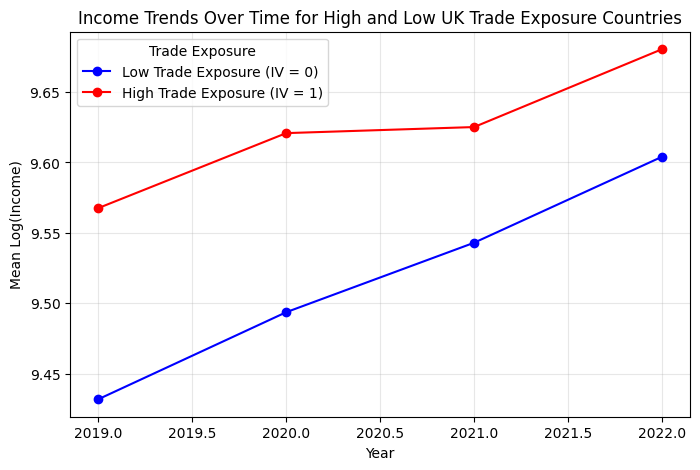

In [ ]:
# First Stage Regression

# Importing our merged and cleaned database
data2 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')


# Assuming your DataFrame is called 'data2'
data2['Log_Income'] = np.log(data2['Income'])

# List of countries with value 0
countries_0 = ['Austria', 'Estonia', 'Finland', 'Hungary', 'Latvia', 'Lithuania', 'Luxembourg', 'Slovenia', 'Slovakia', 'Sweden', 'Bulgaria']

# Set 'Country' and 'Year' as index
data2 = data2.set_index(['Country', 'Year'])

# Create the 'UK trades' column and initialize with 1
data2['UK trades'] = 1

# Set values to 0 for specified countries
data2.loc[data2.index.get_level_values('Country').isin(countries_0), 'UK trades'] = 0

# Sort the MultiIndex
data2 = data2.sort_index()

# Filter for years 2020-2022
data2 = data2.loc[(slice(None), slice(2019, 2022)), :]

# Define variables
y = data2['Waste']  # Dependent variable
X = data2[['Log_Income']]  # Endogenous regressor
Z = data2[['UK trades']]  # Instrumental variable
W = data2[['Education', 'Women', 'Household', 'Age', 'Urban']]  # Exogenous controls

# Run the IV model
model = IV2SLS(dependent=y, exog=W, endog=X, instruments=Z).fit()

# Calculate mean Log_Income for each year and cluster
income_trends = data2.groupby(['Year', 'UK trades'])['Log_Income'].mean().reset_index()

# Plot the trends
plt.figure(figsize=(8, 5))

# Custom colors
colors = {0: 'blue', 1: 'red'}

# Lineplot
for cluster in income_trends['UK trades'].unique():
    subset = income_trends[income_trends['UK trades'] == cluster]
    plt.plot(subset['Year'], subset['Log_Income'],
             color=colors[cluster],
             marker='o', linestyle='-',
             label=f"{'Low Trade Exposure (IV = 0)' if cluster == 0 else 'High Trade Exposure (IV = 1)'}")

# Customization
plt.title('Income Trends Over Time for High and Low UK Trade Exposure Countries')
plt.xlabel('Year')
plt.ylabel('Mean Log(Income)')
plt.legend(title='Trade Exposure')  # Legend with colors
plt.grid(alpha=0.3)
plt.show()

*Figure 7:*

* **Second stage regression:** we then use the portion of income variation explained by Brexit (from the first stage) and regress household waste based on that. This gives us a clearer estimate of how changes in income (stemming from Brexit’s trade shock) might affect household waste.

**(titre équation)**

$$
\text{Waste}_{i,t} = \beta_0 + \beta_1 \cdot \hat{\text{Income}}_{i,t} + \beta_2 \cdot W_{i,t} + \varepsilon_{i,t}
$$

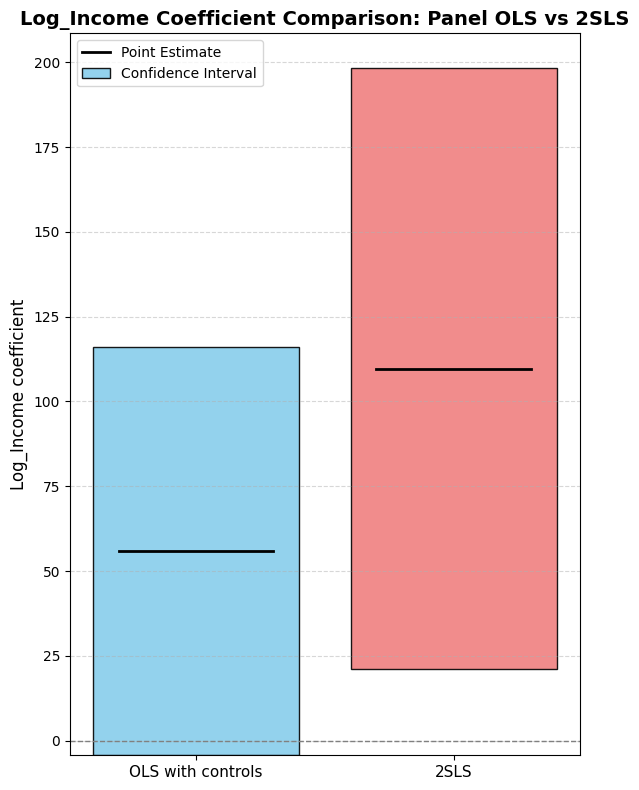

In [ ]:
#Second stage regression

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')
data = data.set_index(['Country', 'Year'])
data['Intercept'] = 1
data['Log_Income'] = np.log(data['Income'])

# ----------------------
# Panel OLS (Model 6)
# ----------------------
model6 = PanelOLS(
    dependent=data['Waste'],
    exog=data[['Intercept', 'Log_Income', 'Education', 'Household', 'Women', 'Urban', 'Age']],
    entity_effects=True,
    time_effects=True
).fit()

# Extract coefficients and CIs for Log_Income
panel_coef = model6.params['Log_Income']
panel_se = model6.std_errors['Log_Income']
panel_lower_ci = panel_coef - 1.96 * panel_se
panel_upper_ci = panel_coef + 1.96 * panel_se

# ----------------------
# 2SLS
# ----------------------
# Assuming data2 is similar to `data` for 2SLS
data = data.copy()
y = data2['Waste']
X = data2[['Log_Income']]
Z = data2[['UK trades']]  # Ensure 'UK trades' exists in your dataset
W = data2[['Education', 'Women', 'Household', 'Age', 'Urban']]

# Run 2SLS
model_iv = IV2SLS(dependent=y, exog=W, endog=X, instruments=Z).fit()

# Extract coefficients and CIs for Log_Income
iv_coef = model_iv.params['Log_Income']
iv_se = model_iv.std_errors['Log_Income']
iv_lower_ci = iv_coef - 1.96 * iv_se
iv_upper_ci = iv_coef + 1.96 * iv_se

# ----------------------
# Combine Results into a DataFrame
# ----------------------
results = pd.DataFrame({
    'Model': ['OLS with controls', '2SLS'],
    'Coefficient': [panel_coef, iv_coef],
    'Lower CI': [panel_lower_ci, iv_lower_ci],
    'Upper CI': [panel_upper_ci, iv_upper_ci]
})

# ----------------------
# Plot the Results
# ----------------------
plt.figure(figsize=(6, 8))

# Updated colors for the rectangles
colors = ['skyblue', 'lightcoral']

# Plot confidence intervals as bars (rectangles)
plt.bar(
    results['Model'],
    results['Upper CI'] - results['Lower CI'],  # Height of the bars
    bottom=results['Lower CI'],  # Starting point
    color=colors,  # Updated colors
    alpha=0.9,
    edgecolor='black',  # Add edges for clarity
    label='Confidence Interval'
)

# Add lines for coefficients
for i, coef in enumerate(results['Coefficient']):
    plt.plot([i - 0.3, i + 0.3], [coef, coef], color='black', lw=2, label='Point Estimate' if i == 0 else "")

# Customize the plot
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Zero reference line
plt.title('Log_Income Coefficient Comparison: Panel OLS vs 2SLS', fontsize=14, weight='bold')
plt.ylabel('Log_Income coefficient', fontsize=12)
plt.xticks(ticks=range(len(results)), labels=results['Model'], fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

*Figure 8:*

This new regression reveals interesting results for our main suspect, income. As we can see in *Figure 8*, **its coefficient increase from 55.9 to 98.3**, with both values being **statically significant**. Running the regression without our IV would therefore have underestimated the impact of income on waste. Let's keep up the good work!



---



## **Heterogeneity: A tale of many countries**

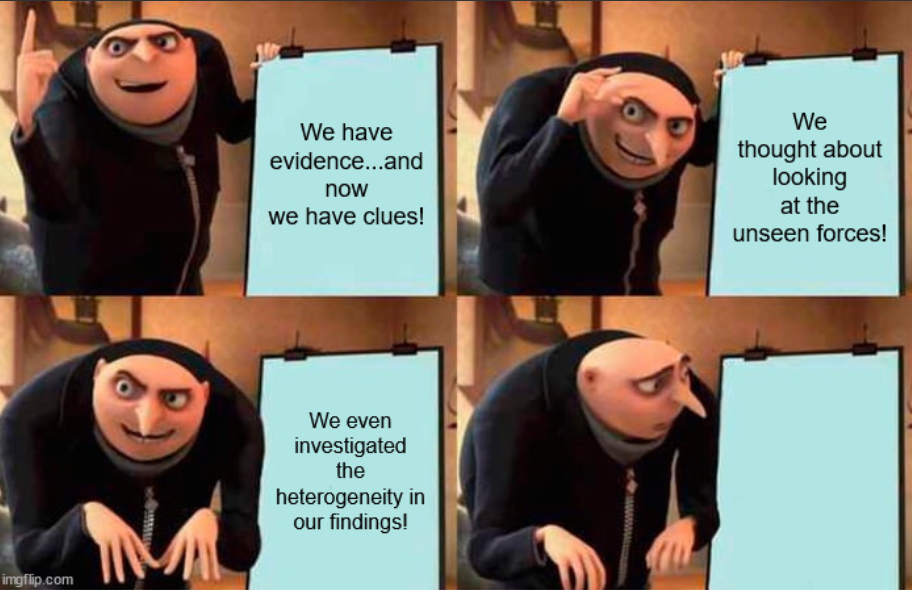

As the Waste-Income case grows more complex, we must investigate unique patterns that each European country follows, based for example on cultural norms and policies. Heterogeneity in the case suggests that one-size-fits-all models rarely work, and that’s why we need to call in local insights.

When we first started looking at all the suspect-variables of our case, we assumed that environmental awareness could strengthen the relationship between Income and Household Waste. **Could it be that in countries with higher environmental awareness, waste generation decreases with rising incomes?**


### Regression analysis and Checking for VIF Data

In [ ]:
# Load the CSV file
data = merged_data
data_copy = data.copy()
data = data.drop(['Education', 'Women', 'Household', 'Age', 'Urban'], axis=1)

#Add data for heterogeneity
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness']], on=['Country', 'Year'], how='left')# Inspect the first few rows of the data

In [ ]:
# Convert 'Country' and 'Year' to categorical variables (if not already)
data['Country'] = data['Country'].astype('category')
data['Year'] = data['Year'].astype('category')

# Check for missing values
print(data.isnull().sum())
data = data[data['Country'] != 'Türkiye']
print(data.head())
num_countries = data['Country'].nunique()
print(f"Number of different countries: {num_countries}")
print(data.isnull().sum())

Country            0
Year               0
Waste              0
Income             0
Log_Income         0
Cluster            0
Env Awareness    162
dtype: int64
    Country  Year       Waste   Income  Log_Income  Cluster  Env Awareness
0   Belgium  2014  484.672171  21705.0    9.985298        2           0.95
1  Bulgaria  2014  376.962939   3311.0    8.105006        0           0.94
2   Czechia  2014  310.164578   7622.0    8.938794        1           0.93
3   Denmark  2014  636.289226  27861.0   10.234983        3           0.96
4   Germany  2014  456.714036  19733.0    9.890048        2           0.94
Number of different countries: 25
Country            0
Year               0
Waste              0
Income             0
Log_Income         0
Cluster            0
Env Awareness    153
dtype: int64


In [ ]:
data['Year'] = data['Year'].astype(int)  # Or float if years are not integers

In [ ]:
# Set 'Country' and 'Year' as index to create a MultiIndex
data = data.set_index(['Country', 'Year'])

In [ ]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

In [ ]:
# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0355
Estimator:                   PanelOLS   R-squared (Between):             -0.8298
No. Observations:                  72   R-squared (Within):              -0.2581
Date:                Thu, Dec 19 2024   R-squared (Overall):             -0.7180
Time:                        11:43:49   Log-likelihood                   -358.71
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.8086
Entities:                          25   P-value                           0.4520
Avg Obs:                       2.8800   Distribution:                    F(2,44)
Min Obs:                       0.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.4461
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [ ]:
# Create the interaction term
data['Income_Awareness'] = data['Income'] * data['Env Awareness']

In [ ]:
# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Income', 'Env Awareness', 'Income_Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model with interaction term
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0491
Estimator:                   PanelOLS   R-squared (Between):             -0.8002
No. Observations:                  72   R-squared (Within):              -0.2688
Date:                Thu, Dec 19 2024   R-squared (Overall):             -0.6963
Time:                        11:43:55   Log-likelihood                   -358.20
Cov. Estimator:                Robust                                           
                                        F-statistic:                      0.7406
Entities:                          25   P-value                           0.5337
Avg Obs:                       2.8800   Distribution:                    F(3,43)
Min Obs:                       0.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.0312
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [ ]:
# Transform 'Income' to its logarithm
data['Log_Income'] = np.log(data['Income'])


In [ ]:
# Update the interaction term to reflect the log transformation
data['Log_Income_Awareness'] = data['Log_Income'] * data['Env Awareness']
X['Log_Income_Awareness'] = data['Log_Income_Awareness']

# Define the dependent variable (Y) and independent variables (X)
Y = data['Waste']
X = data[['Log_Income', 'Log_Income_Awareness', 'Env Awareness']]



# Add a constant term to the independent variables
X = add_constant(X)

# Run the fixed effects model
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True)
results = model.fit(cov_type='robust')

# Display the results
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  Waste   R-squared:                        0.0945
Estimator:                   PanelOLS   R-squared (Between):             -0.0655
No. Observations:                  72   R-squared (Within):               0.2476
Date:                Thu, Dec 19 2024   R-squared (Overall):             -0.0043
Time:                        11:44:01   Log-likelihood                   -356.44
Cov. Estimator:                Robust                                           
                                        F-statistic:                      1.4962
Entities:                          25   P-value                           0.2291
Avg Obs:                       2.8800   Distribution:                    F(3,43)
Min Obs:                       0.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             1.2463
                            

/usr/local/lib/python3.10/dist-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [ ]:
def variance_inflation_factor(exog, exog_idx):
    """
    Calculate the variance inflation factor (VIF) for a given exogenous variable.

    Parameters:
    exog (np.ndarray): The exogenous data matrix.
    exog_idx (int): The index of the exogenous variable to calculate VIF for.

    Returns:
    float: The VIF value.
    """
    # Extract the variable of interest and the remaining variables
    x_i = exog[:, exog_idx]
    x_not_i = np.delete(exog, exog_idx, axis=1)
    model = sm.OLS(x_i, x_not_i).fit()
    r_squared_i = model.rsquared
    vif = 1 / (1 - r_squared_i)
    print(f"VIF for {X.columns[exog_idx]}: {vif}")  # Afficher le VIF pour chaque variable
    return vif

# Assuming 'data' is your DataFrame containing 'Env Awareness', 'Log_Income', 'Log_Income_Awareness'
X = data[['Log_Income', 'Log_Income_Awareness', 'Env Awareness']]
# Drop rows with missing or infinite values before adding a constant
X = X.replace([np.inf, -np.inf], np.nan).dropna()
X = sm.add_constant(X)  # Add a constant term (required for VIF calculation)

# Calculate VIF for each variable in X (excluding the constant)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns[1:] # Exclude the constant term from the variable names
# Calcul et attribution des valeurs VIF :
vif_values = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif_data["VIF"] = vif_values # Attribuer les valeurs VIF à la colonne "VIF"


print(vif_data)


VIF for Log_Income: 842.7800319231774
VIF for Log_Income_Awareness: 1340.7078542126003
VIF for Env Awareness: 190.37593287457597
               Variable          VIF
0            Log_Income   842.780032
1  Log_Income_Awareness  1340.707854
2         Env Awareness   190.375933


### Heterogeneity plot and coefficients

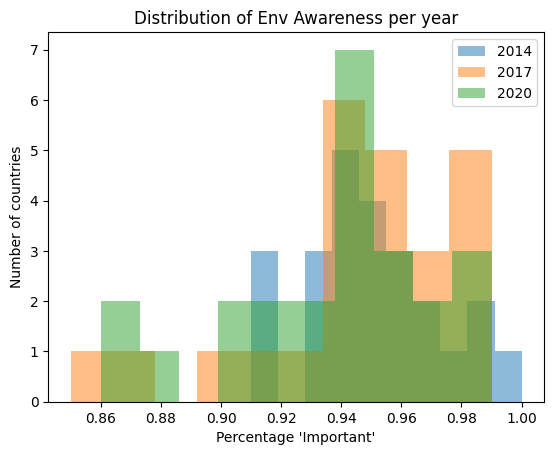

In [ ]:
#Choice of threshold

# Screening of the data for each year
data_2014 = env_awareness_data[env_awareness_data['Year'] == 2014]['Env Awareness']
data_2017 = env_awareness_data[env_awareness_data['Year'] == 2017]['Env Awareness']
data_2020 = env_awareness_data[env_awareness_data['Year'] == 2020]['Env Awareness']

plt.hist(data_2014, bins=10, alpha=0.5, label='2014')
plt.hist(data_2017, bins=10, alpha=0.5, label='2017')
plt.hist(data_2020, bins=10, alpha=0.5, label='2020')

plt.xlabel("Percentage 'Important'")
plt.ylabel("Number of countries")
plt.title("Distribution of Env Awareness per year")
plt.legend(loc='upper right')
plt.show()

*Figure 9: Distribution of Environmental Awareness, 2014-2017-2020*

In [ ]:
#The distribution is symetrical in this range. We could use the median as a threshold.
#Extract 'Env Awareness'
env_awareness_values = env_awareness_data['Env Awareness']

# Calculate threshold
threshold = np.median(env_awareness_values)
print(f"The median of 'Env Awareness' is: {threshold}")

The median of 'Env Awareness' is: 0.95


In [ ]:
# Create dummy variable
env_awareness_data['Env Awareness Dummy'] = (env_awareness_data['Env Awareness'] >= threshold).astype(int)

In [ ]:
# Fusion DataFrames using 'Country' & 'Year' as key variables
data = pd.merge(data, env_awareness_data[['Country', 'Year', 'Env Awareness Dummy']], on=['Country', 'Year'], how='left')

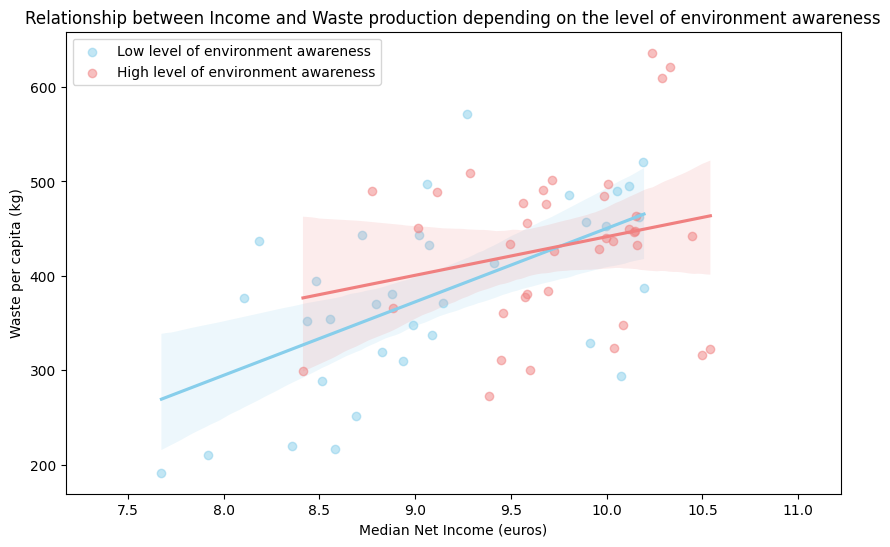

   Env Awareness Dummy   Intercept  Log_Income Coefficient  \
0                    0 -327.458232               77.777966   
1                    1   32.885185               40.863465   

   P-value (Log_Income)  R-squared  
0              0.000277   0.342551  
1              0.161707   0.053658  

Analyse de l'hétérogénéité:
---------------------------
L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.
La différence entre les coefficients d'Income est de 36.9145.
La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :
- Dummy = 0: p-value = 0.0003
- Dummy = 1: p-value = 0.1617


In [ ]:
# Regression for dummy = 0
filtered_data_0 = data[data['Env Awareness Dummy'] == 0]
if len(filtered_data_0['Waste'].unique()) > 1 and len(filtered_data_0['Log_Income'].unique()) > 1:
    model_0 = smf.ols('Waste ~ Log_Income', data=filtered_data_0).fit()
else:
    print("Not enough unique values in data for dummy = 0 to perform regression.")

# Regression for dummy = 1
filtered_data_1 = data[data['Env Awareness Dummy'] == 1]
if len(filtered_data_1['Waste'].unique()) > 1 and len(filtered_data_1['Log_Income'].unique()) > 1:
    model_1 = smf.ols('Waste ~ Log_Income', data=filtered_data_1).fit()
else:
    print("Not enough unique values in data for dummy = 1 to perform regression.")

# Create graph
plt.figure(figsize=(10, 6))

# Use specified colors and limit x-axis
sns.regplot(x='Log_Income', y='Waste', data=filtered_data_0, label="Low level of environment awareness", scatter_kws={'alpha':0.5}, color='skyblue')
sns.regplot(x='Log_Income', y='Waste', data=filtered_data_1, label="High level of environment awareness", scatter_kws={'alpha':0.5}, color='lightcoral')

plt.xlabel("Median Net Income (euros)")
plt.ylabel("Waste per capita (kg)")
plt.title("Relationship between Income and Waste production depending on the level of environment awareness")
plt.legend()

# Limit x-axis
plt.xlim(data['Log_Income'].min() - 0.5, data['Log_Income'].max() + 0.5)  # Adjust values as needed

plt.show()

# Create DataFrame to store results
results_df = pd.DataFrame({
    'Env Awareness Dummy': [0, 1],
    'Intercept': [model_0.params['Intercept'], model_1.params['Intercept']],
    'Log_Income Coefficient': [model_0.params['Log_Income'], model_1.params['Log_Income']], # This is the column name you used
    'P-value (Log_Income)': [model_0.pvalues['Log_Income'], model_1.pvalues['Log_Income']],
    'R-squared': [model_0.rsquared, model_1.rsquared]
})

# Display DataFrame
print(results_df)

# Analysis of the results
print("\nAnalyse de l'hétérogénéité:")
print("---------------------------")
# Use 'Log_Income Coefficient' instead of 'Income Coefficient'
if results_df.loc[0, 'Log_Income Coefficient'] > results_df.loc[1, 'Log_Income Coefficient']:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 0.")
else:
    print("L'effet de l'Income sur Waste est plus fort lorsque la 'Env Awareness Dummy' est à 1.")

# Use 'Log_Income Coefficient' instead of 'Income Coefficient'
print(f"La différence entre les coefficients d'Income est de {results_df.loc[0, 'Log_Income Coefficient'] - results_df.loc[1, 'Log_Income Coefficient']:.4f}.")

print("La significativité statistique du coefficient d'Income varie également selon la valeur de la dummy :")
print(f"- Dummy = 0: p-value = {results_df.loc[0, 'P-value (Log_Income)']:.4f}")
print(f"- Dummy = 1: p-value = {results_df.loc[1, 'P-value (Log_Income)']:.4f}")

*Figure 10: Relationship between income and waste by level of environmental awareness*

In [ ]:
#Coefficients OLS

# Merge data_copy with env_awareness_data to add 'Env Awareness' column before using it
data_copy = pd.merge(data_copy, env_awareness_data[['Country', 'Year', 'Env Awareness']], on=['Country', 'Year'], how='left')# Inspect the first few rows of the data
data_copy['Income_Awareness'] = data_copy['Income'] * data_copy['Env Awareness']
data_copy['Log_Income'] = np.log(data_copy['Income'])
data_copy['Log_Income_Awareness'] = data_copy['Log_Income'] * data_copy['Env Awareness']

# Convert 'Country' and 'Year' to categorical variables (if not already)
data_copy['Country'] = data_copy['Country'].astype('category')
data_copy['Year'] = data_copy['Year'].astype(int)  # Or float if years are not integers
# Set 'Country' and 'Year' as index to create a MultiIndex
data_copy = data_copy.set_index(['Country', 'Year'])

# Define the dependent variable (Y) and independent variables (X)
Y = data_copy['Waste']
X = data_copy[['Log_Income', 'Env Awareness', 'Education', 'Age', 'Women', 'Urban', 'Household', 'Log_Income_Awareness']]

# Add a constant term to the independent variables
X = add_constant(X)


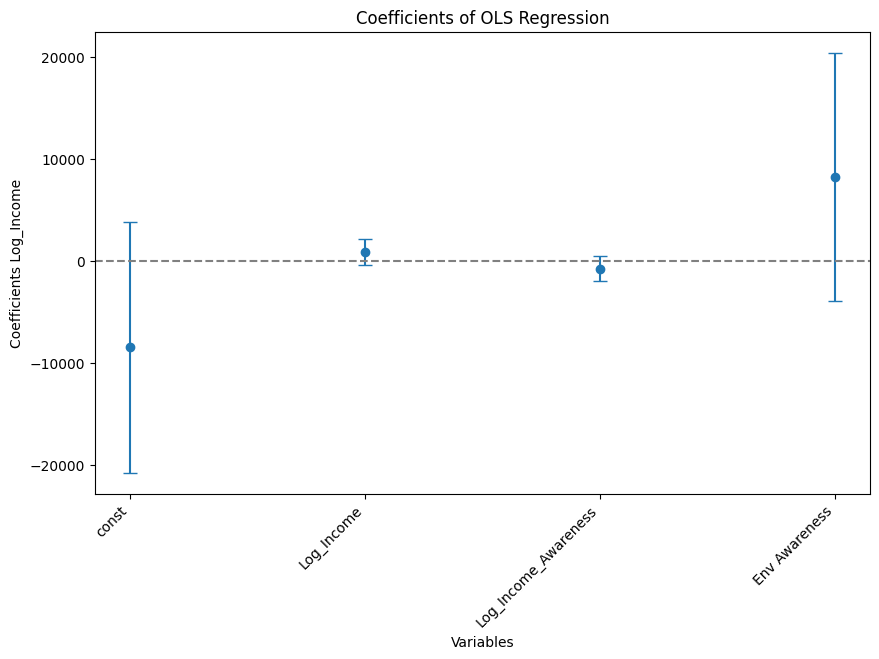

              Variable  Coefficient    Lower CI    Upper CI
Log_Income  Log_Income   870.147313 -382.669855  2122.96448


In [ ]:
# Extract coefficients and confidence intervals
coefs = results.params  # Access parameters from the results object
conf_ints = results.conf_int()

# Create graph with results
plt.figure(figsize=(10, 6))
# Access confidence intervals using column names 'lower' and 'upper'
lower_error = coefs - conf_ints['lower']  # Changed from conf_ints[0]
upper_error = conf_ints['upper'] - coefs  # Changed from conf_ints[1]
yerr = np.vstack([lower_error, upper_error])  # Combine lower and upper errors for errorbar

plt.errorbar(coefs.index, coefs.values, yerr=yerr, fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Variables')
plt.ylabel('Coefficients Log_Income')
plt.title('Coefficients of OLS Regression')
plt.show()

# Create dataframe with results
results_df = pd.DataFrame({
    'Variable': coefs.index,
    'Coefficient': coefs.values,
    'Lower CI': conf_ints['lower'], # Changed from conf_ints[0]
    'Upper CI': conf_ints['upper']  # Changed from conf_ints[1]
})

# Display results for 'Log_Income' in each group
print(results_df[results_df['Variable'].isin(['Log_Income', 'Q("Env Awareness Dummy")'])])

*Figure 11: Coefficients of the OLS regression for heterogeneity*

OLS Coefficient for Income (Low Awareness): 77.77796632757719
OLS Coefficient for Income (High Awareness): 40.86346490366997


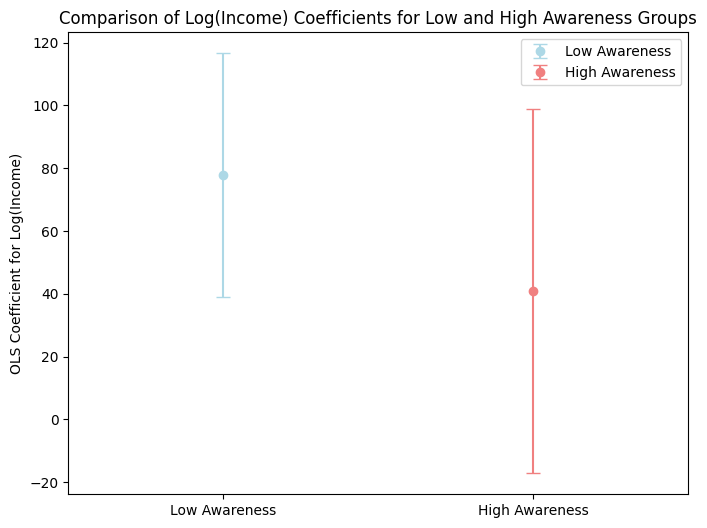

In [ ]:
# Regression for dummy = 0 (low awareness)
filtered_data_0 = data[data['Env Awareness Dummy'] == 0]
if len(filtered_data_0['Waste'].unique()) > 1 and len(filtered_data_0['Log_Income'].unique()) > 1:
    model_0 = smf.ols('Waste ~ Log_Income', data=filtered_data_0).fit()
    income_coef_0 = model_0.params['Log_Income']  # Extract Income coefficient for low awareness group
    conf_int_0 = model_0.conf_int().loc['Log_Income']  # Get confidence intervals for Income
else:
    print("Not enough unique values in data for dummy = 0 to perform regression.")
    income_coef_0 = None  # Assign None if regression cannot be performed
    conf_int_0 = None  # Assign None if regression cannot be performed

# Regression for dummy = 1 (high awareness)
filtered_data_1 = data[data['Env Awareness Dummy'] == 1]
if len(filtered_data_1['Waste'].unique()) > 1 and len(filtered_data_1['Income'].unique()) > 1:
    model_1 = smf.ols('Waste ~ Log_Income', data=filtered_data_1).fit()
    income_coef_1 = model_1.params['Log_Income']  # Extract Income coefficient for high awareness group
    conf_int_1 = model_1.conf_int().loc['Log_Income']  # Get confidence intervals for Income
else:
    print("Not enough unique values in data for dummy = 1 to perform regression.")
    income_coef_1 = None  # Assign None if regression cannot be performed
    conf_int_1 = None  # Assign None if regression cannot be performed

# Display coefficients
print(f"OLS Coefficient for Income (Low Awareness): {income_coef_0}")
print(f"OLS Coefficient for Income (High Awareness): {income_coef_1}")

# Plotting the coefficients using plt.errorbar
groups = ['Low Awareness', 'High Awareness']
coefficients = [income_coef_0, income_coef_1]
conf_intervals = [model_0.conf_int().loc['Log_Income'], model_1.conf_int().loc['Log_Income']]
colors = ['lightblue', 'lightcoral']  # Colors for low and high awareness

plt.figure(figsize=(8, 6))

for i, group in enumerate(groups):
    plt.errorbar(
        i,
        coefficients[i],
        yerr=[[coefficients[i] - conf_intervals[i][0]], [conf_intervals[i][1] - coefficients[i]]],
        fmt='o',
        capsize=5,
        label=group,
        color=colors[i]  # Apply the desired color
    )

plt.xticks(range(len(groups)), groups)  # Set x-axis ticks to group names
plt.ylabel('OLS Coefficient for Log(Income)')
plt.title('Comparison of Log(Income) Coefficients for Low and High Awareness Groups')
plt.legend()  # Show legend
plt.xlim(-0.5, 1.5)
plt.show()

*Figure 12: OLS coefficients for net income by level of awareness*

###   Heterogeneity results
The results of our investigation reveals that **income (statistically) significantly influences household waste generation across countries with lower levels of awareness.** On the other hand, **in countries with higher levels of awareness, income appears to have a less pronounced impact on household waste (not statistically significant).**


The estimated coefficient for the median net income is **77.8 for the low levels** of awarenessy, and **40.9 for the high levels of awareness**.

These surprising results could be explained by the **survey data used** to perform the analysis, as participants were simply asked to state whether or not the preservation of the environment was important to them. Most participants answered that it was indeed important, without anything at stake.

The generation rates of household waste could vary widely across countries due to factors like  levels of awareness, but also economic structure, industrial development, policies, cultural habits and waste management systems, among others.

**This heterogeneity supports our initial hypothesis that the relationship between income and household waste can be context-dependent and suggests to us the importance of investigating all angles of our case.**




---



## **Discussion: Can we solve the mystery?**

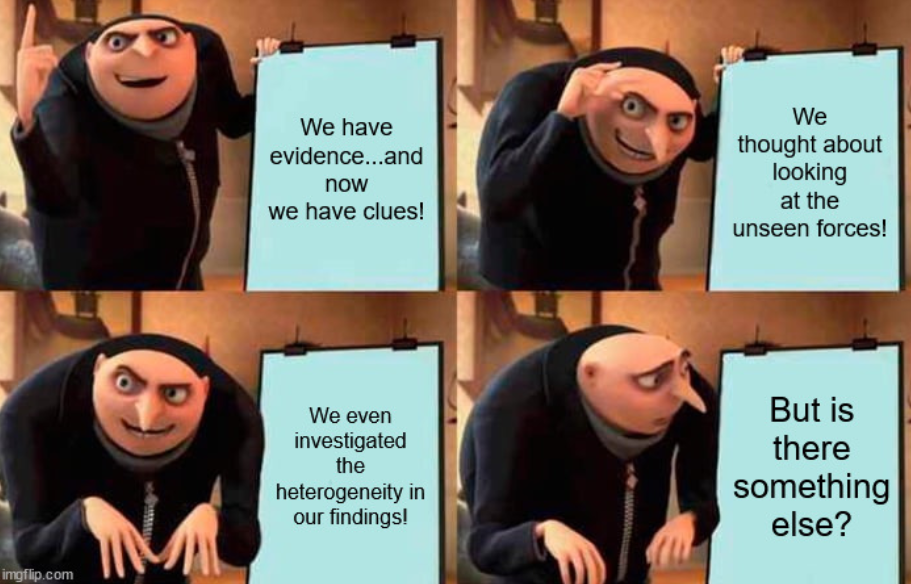

*While we solved parts of the mystery, others remain.*

* Summarize again + what can we conclude in our sample
redaction: “There is an agreement that income is correlated with waste. We estimated X euros = Y kg. We confirm what we found in the lit but at EU level. Given we still have endogeneity issues we are not able to quantify the impact.”
however imperfect bc not iv, not accounted factor, causality as a contributor
is the story more complex, tangled up with factors like education, household size, and government policy?

* Is there something else?
idea: wealthier families dine out more often than lower income families, who eat more at home, therefore generating more SW. However, they did not mention that if this is the case, then it would explain the result, but that this result might not well represent reality, since SW generated by people eating at restaurants would not be captured.


* Is it the reverse?

found in the literature: significant bidirectional causal link (feedback effect) between MW and GDP (Assessing the relationship among waste generation, wealth, and GHG emissions in Switzerland: Some policy proposals for the optimization of the municipal solid waste in a circular economy perspective) => for countries that have waste-based activitie?
Cost of Waste Management: The inefficiency or high cost of waste management can reduce household disposable income, as taxes or fees for waste services increase. Example: Households in areas with advanced (and expensive) waste management systems may see reduced net income due to higher taxes or service fees.
Economic Opportunities: Waste management systems can create local jobs and business opportunities, potentially boosting household incomes in certain sectors. Example: Recycling plants, waste collection services, and renewable energy production from waste can directly contribute to household incomes


* Can we extrapolate: (to what extent we can extrapolate the results beyond the scope of the study)

* Futur direction
papers and causal effect quantified in literature => is it the case?


Idées en vrac:

*   Age: les vieux consomment moins + les vieux ont plus tendance à acheter pour les autres
*   Élément de liste





---



##**Appendix File**


### Appendix 1:  Description of the variables and data sources
*ajouter une table avec toutes les variables et leurs définitions*

###Appendix 2:  Basic OLS Regression Table

In [ ]:
#Basic OLS Regression Table

html_table_code = """
<table style="text-align:center"><tr><td colspan="7" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="6"><em>Dependent variable: Waste</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td><td>(5)</td><td>(6)</td></tr>
<tr><td colspan="7" style="border-bottom: 1px solid black"></td></tr>

<tr><td style="text-align:left">Intercept</td><td>-620.243<sup>**</sup></td><td>-816.472<sup>***</sup></td><td>-1227.276<sup>***</sup></td><td>-1230.998<sup>***</sup></td><td>-1868.196<sup>***</sup></td><td>-1367.345<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(253.627)</td><td>(264.489)</td><td>(292.511)</td><td>(289.875)</td><td>(712.891)</td><td>(689.016)</td></tr>
<tr><td style="text-align:left">Log_Income</td><td>108.741<sup>***</sup></td><td>112.101<sup>***</sup></td><td>119.333<sup>***</sup></td><td>91.748<sup>***</sup></td><td>101.228<sup>***</sup></td><td>55.925<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(26.772)</td><td>(26.515)</td><td>(26.093)</td><td>(28.876)</td><td>(30.461)</td><td>(30.745)</td></tr>
<tr><td style="text-align:left">Education</td><td></td><td>5.554<sup>**</sup></td><td>5.467<sup>**</sup></td><td>4.198<sup>*</sup></td><td>4.240<sup>*</sup></td><td>7.548<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(2.375)</td><td>(2.327)</td><td>(2.381)</td><td>(2.382)</td><td>(2.387)</td></tr>
<tr><td style="text-align:left">Household</td><td></td><td></td><td>144.364<sup>***</sup></td><td>150.841<sup>***</sup></td><td>164.891<sup>***</sup></td><td>105.811<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td>(47.647)</td><td>(47.313)</td><td>(49.450)</td><td>(48.955)</td></tr>
<tr><td style="text-align:left">Women</td><td></td><td></td><td></td><td>4.261<sup>**</sup></td><td>4.488<sup>**</sup></td><td>1.751<sup></sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td>(1.986)</td><td>(1.999)</td><td>(2.001)</td></tr>
<tr><td style="text-align:left">Urban</td><td></td><td></td><td></td><td></td><td>676.416<sup></sup></td><td>-988.093<sup></sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td><td>(691.366)</td><td>(755.803)</td></tr>
<tr><td style="text-align:left">Age</td><td></td><td></td><td></td><td></td><td></td><td>33.089<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td><td></td><td></td><td>(7.340)</td></tr>

<td colspan="7" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align: left">Observations</td><td>234</td><td>234</td><td>234</td><td>234</td><td>234</td><td>234</td></tr><tr><td style="text-align: left">N. of groups</td><td>26</td><td>26</td><td>26</td><td>26</td><td>26</td><td>26</td></tr><tr><td style="text-align: left">R<sup>2</sup></td><td>0.077</td><td>0.101</td><td>0.141</td><td>0.161</td><td>0.165</td><td>0.244</td></tr><tr><td style="text-align: left">Residual Std. Error</td><td>10.834 (df=199)</td><td>12.499 (df=198)</td><td>14.798 (df=197)</td><td>15.836 (df=196)</td><td>16.077 (df=195)</td><td>19.603 (df=194)</td></tr><tr><td style="text-align: left">F Statistic</td><td>16.498<sup>***</sup> (df=35; 199)</td><td>11.169<sup>***</sup> (df=36; 198)</td><td>10.813<sup>***</sup> (df=37; 197)</td><td>9.410<sup>***</sup> (df=38; 196)</td><td>7.718<sup>***</sup> (df=39; 195)</td><td>10.456<sup>***</sup> (df=40; 194)</td></tr>
<tr><td colspan="7" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align: left">Note:</td><td colspan="6" style="text-align: right"><sup>*</sup>p&lt;0.1; <sup>**</sup>p&lt;0.05; <sup>***</sup>p&lt;0.01</td></tr></table>
"""

# Render the HTML table
display(HTML(html_table_code))

*Figure 13: Basic OLS Regression Table*

Waou! Don’t be scared like this Inspector Garbage! I’m pretty sure that a graduated EPFL student from criminology will have no issue understanding the outcome of a simple linear regression! Let me help you through it :)

The first column on the left, marked with a little (1) at the top, represents our first linear regression. Remember? The one we did previously, comparing only the impact of the logarithm of income on household waste. Then, as you move to the columns on the right, we add one variable at a time. The second column with the little (2) at the top is the same linear regression as the first one but with the variable education added. The third column is the same linear regression as the first one but with the variable education and household added, and so on until all the variables are added to the same equation! You see? Easy!

And what about the little stars above the numbers, ranging from one to three? These stars indicate statistical significance. As long as there is a star, the variable is statistically significant in our equation, meaning it has a meaningful impact on the results.


### Appendix 3: Multicollinearity analysis

In this section, we analyze the multicollinearity of our variables using a correlation matrix and Variance Inflation Factor (VIF) indicators.

The correlation matrix reveals several interesting relationships among the variables. Overall, most correlations are moderate or low, indicating limited multicollinearity. The exception is the correlation between household size and the proportion of women in the workforce, which is high. To confirm our intuition that keeping it in the regression is relevant, we have calculated the Variance Inflation Factors (VIF), which assess how much multicollinearity we have between our controls. The rule of thumb is that a VIF greater than 5 suggests it is better to drop the variable of the regression, which was not the case here.


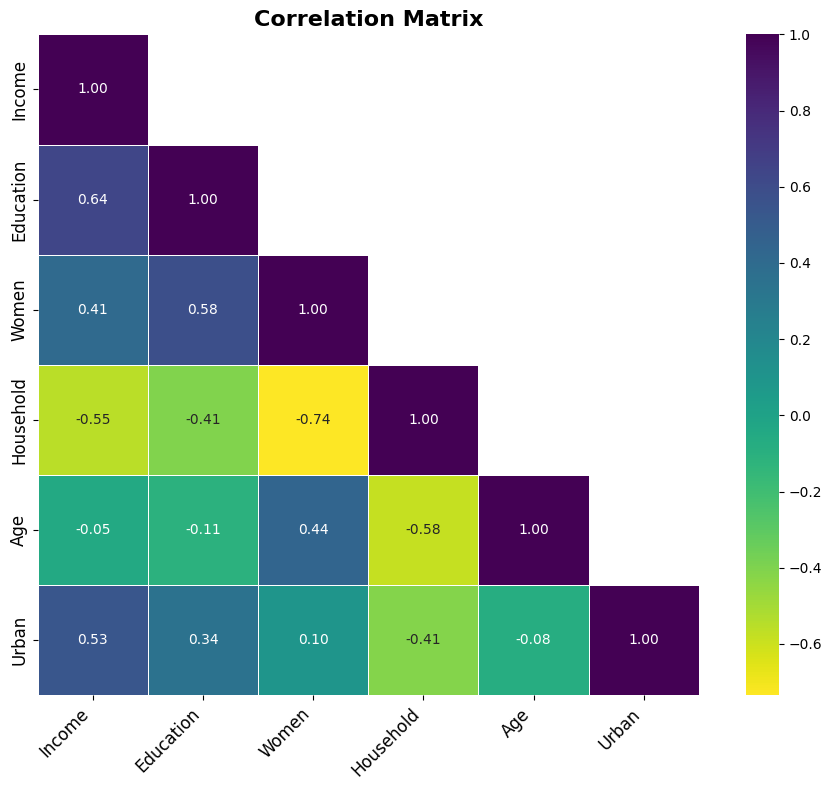

In [ ]:
#Correlation Matrix
# Select the control variables
controls = merged_data[['Income', 'Education', 'Women', 'Household', 'Age', 'Urban']]

# Compute the correlation matrix
correlation_matrix = controls.corr()

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Create a heatmap with the reversed color scale and mask
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Mask the upper triangle but keep the diagonal
    annot=True,
    fmt='.2f',
    cmap='viridis_r',  # Reversed color scale
    cbar=True,
    square=True,
    linewidths=0.5,  # Adds light grid lines for visual separation
    annot_kws={"size": 10}  # Annotation text size
)
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

*Figure 14: Correlation Matrix*

In [ ]:
# Select the control variables
controls = merged_data[['Education', 'Women', 'Household', 'Age', 'Urban']]

# Add a constant column for VIF calculation
controls_with_const = sm.add_constant(controls)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': controls_with_const.columns,
    'VIF': [variance_inflation_factor(controls_with_const.values, i) for i in range(controls_with_const.shape[1])]
})

# Drop the constant term from the table
vif_data = vif_data[vif_data['Variable'] != 'const']

# Display the VIF table in Colab
print(vif_data)

VIF for const: 1786.2922945005505
VIF for Log_Income: 2.3009267101890036
VIF for Env Awareness: 3.743396594784612
VIF for Education: 4.404227447702552
VIF for Age: 2.3376945437689156
VIF for Women: 1.825852877504522
    Variable       VIF
1  Education  2.300927
2      Women  3.743397
3  Household  4.404227
4        Age  2.337695
5      Urban  1.825853




---



## **References File**

[1] [World Bank Group. (2024). *What a Waste Global Database.* (Consulted in December 2024).](https://datacatalog.worldbank.org/search/dataset/0039597/What-a-Waste-Global-Database)

[2] [Hoornweg and Bhada-Tata. (2012). *What a Waste : A Global Review of Solid Waste Management.*Urban development series;knowledge papers no. 15. © World Bank, Washington, DC.](http://hdl.handle.net/10986/17388)

[3] [Irwan, Dani & Basri, N. & Watanabe, Kohei & Abushammala, Mohammed. (2013). *Influence of Income Level and Age on Per Capita Household Solid Waste Generation in Putrajaya, Malaysia.* Jurnal Teknologi.](https://www.researchgate.net/publication/286509250_Influence_of_Income_Level_and_Age_on_Per_Capita_Household_Solid_Waste_Generation_in_Putrajaya_Malaysia)

[4] [Cosimo Magazzino, Pasquale Marcello Falcone. (2022).
*Assessing the relationship among waste generation, wealth, and GHG emissions in Switzerland: Some policy proposals for the optimization of the municipal solid waste in a circular economy perspective*. Journal of Cleaner Production,Volume 351.](https://www.sciencedirect.com/science/article/abs/pii/S095965262201174X)

[5] [Wilson DC, Rodic L, Scheinberg A, Velis CA, Alabaster G. (2012). *Comparative analysis of solid waste management in 20 cities.* Waste Manag Res.](https://pubmed.ncbi.nlm.nih.gov/22407700/)

[6] [Ogwueleka, T.C. (2013). *Survey of Household Waste Composition and Quantities in Abuja, Nigeria.* Resources Conservation and Recycling, 77, 52-60.](https://doi.org/10.1016/j.resconrec.2013.05.011)

[7] [Bandara, Nilanthi & Hettiaratchi, Joseph & Wirasinghe, S.C. & Pilapiiya, Sumith. (2007). *Relation of waste generation and composition to socio-economic factors: A case study.* Environmental monitoring and assessment.](https://www.researchgate.net/publication/6379317_Relation_of_waste_generation_and_composition_to_socio-economic_factors_A_case_study)

[8] [Kayode, A. M., & Omole, F. K. (2011). *Some Socio-Economic Factors Affecting Solid Wastes Generation and Disposal in Ibadan Metropolis, Nigeria.* Journal of Environmental Issues and Agriculture in Developing Countries, 3, 55-64.](https://www.semanticscholar.org/paper/SOME-SOCIO-ECONOMIC-FACTORS-AFFECTING-SOLID-WASTES-Kayode/018680946d8a2669a853d28b656598ba6cb518ea)

[9] [“Hoornweg, Daniel; Bhada-Tata, Perinaz. (2012). *What a Waste : A Global Review of Solid Waste Management.* Urban development series;knowledge papers no. 15. © World Bank, Washington, DC.](https://openknowledge.worldbank.org/entities/publication/1a464650-9d7a-58bb-b0ea-33ac4cd1f73c)

[10] [Monavari, Seyed Masoud; Omrani, Ghasem Ali; Karbassi, Abdolreza; Raof, Farzaneh Fakheri. (2012).*The effects of socioeconomic parameters on household solid-waste generation and composition in developing countries (a case study: Ahvaz, Iran)*. Environmental Monitoring and Assessment](https://link.springer.com/article/10.1007/s10661-011-2082-y)

[11] [Saniye Keser, Sebnem Duzgun, Aysegul Aksoy. (2012). *Application of spatial and non-spatial data analysis in determination of the factors that impact municipal solid waste generation rates in Turkey.* Waste Management, Volume 32, Issue 3, Pages 359-371.](https://www.sciencedirect.com/science/article/abs/pii/S0956053X11004764)

[12] [Bruno Ribas Alzamora, Raphael Tobias de Vasconcelos Barros, Leise Kelli de Oliveira, Sabrina Silveira Gonçalves. (2022). *Forecasting and the influence of socioeconomic factors on municipal solid waste generation: A literature review.*
Environmental Development,Volume 44.](https://www.sciencedirect.com/science/article/abs/pii/S2211464522000367)

[13] [Chetna Chauhan, Amandeep Dhir, Manzoor Ul Akram, Jari Salo. (2021). *Food loss and waste in food supply chains. A systematic literature review and framework development approach.* Journal of Cleaner Production, Volume 295.](https://www.sciencedirect.com/science/article/pii/S0959652621006582)

[14] [D. Khan, A. Kumar, S.R. Samadder. (2016). *Impact of socioeconomic status on municipal solid waste generation rate.* Waste Management, Volume 49.](https://www.sciencedirect.com/science/article/abs/pii/S0956053X16300204)

[15] [Noufal, Mohamad & Yuanyuan, Liu & Maalla, Zena & Adipah, Sylvia. (2020). *Determinants of Household Solid Waste Generation and Composition in Homs City, Syria.* Journal of Environmental and Public Health.](https://www.researchgate.net/publication/347198248_Determinants_of_Household_Solid_Waste_Generation_and_Composition_in_Homs_City_Syria)

[16] [Beutel, A. M., & Marini, M. M. (1995). *Gender and values.* American Sociological Review, 60(3), 436–448.](https://doi.org/10.2307/2096423)